# Project Phase 0 - Problem Scoping & Problem Description

### The problem is to determine whether or not a website is legitimate or used for phishing. Phishing websites are fraudulent websites designed to deceive users and steal their sensitive information, such as login credentials or financial details.

### Phishing impacts everyone who uses the internet, but certain groups have a greater interest in addressing phishing. Businesses that operate online have an interest in identifying and blocking phishing websites to safeguard their customers' data and maintain their trust. Additionally, law enforcement agencies that focus on cybercrimes like phishing would benefit from the early detection of phishing websites. Finally, internet users are stakeholders because they rely on the accuracy of detection systems to protect themselves from falling victim to online scams

### Phishing websites often use complex and evolving tactics. Machine learning models can identify patterns and anomalies that may not be apparent with traditional methods. Furthermore, machine learning models can adapt to changing phishing techniques and evolving threats. Finally machine learning leverages historical data to make predictions, allowing for the identification of new and emerging phishing websites. Despite the advantages, machine learning models may still generate false positives and negatives, and adjustments are necessary to correct these errors

## Research Questions:

### 1. How can we minimize false positives while maintaining a high level of true positives in the detection process?

### 2. How can we ensure that the model generalizes well to new phishing tactics?

### 3. What are the most important features for distinguishing between legitimate and phishing websites?

# Project Phase I - Data Preprocessing

### Name: Leonardo Cacho and Nicholai Espenido

### Email: lmc6615@psu.edu and nje5226@psu.edu

### Contributions: Imputation Leo, finding and removing outliers Leo, assignment submission Leo, normalization Leo, justifications NJ, column deletion NJ, encoding NJ


## Preparation

### We started by importing the data and necessary libraries that we used throughout the project.


In \[3\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pprint

    df=pd.read_csv('Phishing_Legitimate_train_missing_data.csv',index_col='id',na_values=['',' ','n/a','null'])
    df.head()

Out\[3\]:

|     | NumDots | SubdomainLevel | PathLevel | UrlLength | NumDash | NumDashInHostname | AtSymbol | TildeSymbol | NumUnderscore | NumPercent | ... | InsecureForms | RelativeFormAction | ExtFormAction | AbnormalFormAction | RightClickDisabled | PopUpWindow | IframeOrFrame | MissingTitle | ImagesOnlyInForm | CLASS_LABEL |
|-----|---------|----------------|-----------|-----------|---------|-------------------|----------|-------------|---------------|------------|-----|---------------|--------------------|---------------|--------------------|--------------------|-------------|---------------|--------------|------------------|-------------|
| id  |         |                |           |           |         |                   |          |             |               |            |     |               |                    |               |                    |                    |             |               |              |                  |             |
| 1   | 3.0     | 1.0            | 5.0       | 81.0      | 1.0     | 1.0               | 0.0      | 0.0         | 1.0           | 0.0        | ... | 1.0           | 0.0                | 0.0           | 0.0                | 0.0                | 0.0         | 0.0           | 0.0          | 0.0              | 0           |
| 2   | 2.0     | 0.0            | 5.0       | 78.0      | 1.0     | 1.0               | 0.0      | 0.0         | 3.0           | 0.0        | ... | 1.0           | 1.0                | 0.0           | 0.0                | 0.0                | 0.0         | 0.0           | 0.0          | 0.0              | 1           |
| 3   | 3.0     | 0.0            | 4.0       | 53.0      | 1.0     | 0.0               | 0.0      | 0.0         | 0.0           | 0.0        | ... | 1.0           | 0.0                | 1.0           | 0.0                | 0.0                | 0.0         | 1.0           | 0.0          | 0.0              | 1           |
| 4   | 3.0     | 1.0            | 6.0       | 68.0      | 0.0     | 0.0               | 0.0      | 0.0         | 0.0           | 0.0        | ... | 1.0           | 0.0                | 0.0           | 0.0                | 0.0                | 0.0         | 0.0           | 0.0          | 0.0              | 1           |
| 5   | 3.0     | 0.0            | 3.0       | 61.0      | 0.0     | 0.0               | 0.0      | 0.0         | 0.0           | 0.0        | ... | 1.0           | 0.0                | 0.0           | 0.0                | 0.0                | 0.0         | 1.0           | 0.0          | 0.0              | 1           |

5 rows × 38 columns





## Identifying and Removing Missing Values

### After importing the data, we looked for rows with missing values. Then we decided to remove rows which lacked values for more than two features. Removing rows with missing values is important because missing values can significantly harm the accuracy of our machine learning model.
In \[4\]:

    missing_rows = df[df.isnull().any(axis=1)]
    print(missing_rows)

          NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
    id                                                             
    7         NaN             0.0        1.0        NaN      0.0   
    23        2.0             0.0        1.0        NaN     12.0   
    27        4.0             1.0        3.0       72.0      0.0   
    145       1.0             0.0        6.0        NaN     12.0   
    150       3.0             1.0        3.0       56.0      0.0   
    419       3.0             1.0        5.0       73.0      1.0   
    831       1.0             0.0        0.0       30.0      1.0   
    903       2.0             NaN        NaN        NaN      NaN   
    980       2.0             0.0        3.0       52.0      1.0   
    1011      2.0             1.0        3.0       64.0      1.0   
    1015      3.0             1.0        4.0      101.0     10.0   
    1236      1.0             0.0        5.0        NaN     12.0   
    1238      2.0             1.0        2.0       36.0      1.0   
    1275      7.0             2.0        2.0      206.0     55.0   
    1313      2.0             0.0        5.0       60.0      0.0   
    1760      1.0             0.0        5.0       82.0      NaN   
    1821      2.0             0.0        5.0       70.0      1.0   
    2776      2.0             0.0        4.0       73.0      1.0   
    2777      2.0             1.0        0.0       25.0      0.0   
    2778      2.0             1.0        3.0       42.0      0.0   
    2779      2.0             0.0        7.0       86.0      0.0   
    2780      3.0             1.0        2.0       72.0      4.0   
    4178      2.0             1.0        3.0      118.0      0.0   
    4179      3.0             1.0        4.0       53.0      0.0   
    4558      4.0             1.0        4.0       70.0      1.0   
    4898      4.0             0.0        1.0      213.0      2.0   
    4912      4.0             1.0        4.0       60.0      0.0   
    4963      1.0             0.0        5.0       95.0      8.0   
    4973      2.0             0.0        1.0       62.0      0.0   
    4988      3.0             1.0        1.0        NaN      9.0   

          NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
    id                                                                          
    7                   0.0       0.0          0.0            2.0         0.0   
    23                  0.0       0.0          0.0            0.0         0.0   
    27                  0.0       0.0          0.0            0.0         0.0   
    145                 0.0       0.0          0.0            0.0         0.0   
    150                 0.0       0.0          0.0            0.0         0.0   
    419                 0.0       0.0          0.0            0.0         0.0   
    831                 1.0       0.0          0.0            0.0         0.0   
    903                 NaN       NaN          NaN            0.0         0.0   
    980                 NaN       NaN          NaN            NaN         NaN   
    1011                0.0       0.0          1.0            0.0         0.0   
    1015                0.0       0.0          0.0            0.0         0.0   
    1236                0.0       0.0          0.0            0.0         0.0   
    1238                0.0       0.0          0.0            0.0         0.0   
    1275                0.0       0.0          0.0            0.0         0.0   
    1313                NaN       0.0          0.0            0.0         0.0   
    1760                NaN       NaN          NaN            NaN         NaN   
    1821                0.0       0.0          0.0            0.0         0.0   
    2776                0.0       0.0          0.0            0.0         0.0   
    2777                0.0       0.0          0.0            0.0         0.0   
    2778                0.0       0.0          0.0            0.0         0.0   
    2779                0.0       0.0          0.0            0.0         0.0   
    2780                0.0       0.0          0.0            0.0         0.0   
    4178                0.0       0.0          0.0            0.0         0.0   
    4179                0.0       0.0          0.0            0.0         0.0   
    4558                0.0       0.0          0.0            0.0         0.0   
    4898                0.0       0.0          0.0            2.0         NaN   
    4912                0.0       0.0          0.0            0.0         0.0   
    4963                0.0       0.0          0.0            0.0         0.0   
    4973                0.0       0.0          0.0            0.0         0.0   
    4988                0.0       0.0          0.0            2.0         0.0   

          ...  InsecureForms  RelativeFormAction  ExtFormAction  \
    id    ...                                                     
    7     ...            1.0                 0.0            0.0   
    23    ...            1.0                 0.0            0.0   
    27    ...            1.0                 0.0            0.0   
    145   ...            1.0                 0.0            0.0   
    150   ...            1.0                 0.0            0.0   
    419   ...            1.0                 0.0            0.0   
    831   ...            0.0                 0.0            0.0   
    903   ...            0.0                 0.0            0.0   
    980   ...            1.0                 0.0            0.0   
    1011  ...            1.0                 0.0            0.0   
    1015  ...            1.0                 0.0            0.0   
    1236  ...            0.0                 0.0            0.0   
    1238  ...            1.0                 0.0            0.0   
    1275  ...            0.0                 0.0            0.0   
    1313  ...            1.0                 0.0            0.0   
    1760  ...            1.0                 0.0            0.0   
    1821  ...            1.0                 0.0            0.0   
    2776  ...            NaN                 NaN            NaN   
    2777  ...            NaN                 NaN            NaN   
    2778  ...            NaN                 NaN            NaN   
    2779  ...            NaN                 NaN            NaN   
    2780  ...            NaN                 NaN            NaN   
    4178  ...            1.0                 0.0            0.0   
    4179  ...            1.0                 1.0            0.0   
    4558  ...            1.0                 0.0            0.0   
    4898  ...            0.0                 0.0            0.0   
    4912  ...            1.0                 1.0            0.0   
    4963  ...            1.0                 1.0            0.0   
    4973  ...            1.0                 1.0            0.0   
    4988  ...            0.0                 0.0            0.0   

          AbnormalFormAction  RightClickDisabled  PopUpWindow  IframeOrFrame  \
    id                                                                         
    7                    0.0                 0.0          0.0            0.0   
    23                   0.0                 1.0          0.0            1.0   
    27                   0.0                 0.0          0.0            0.0   
    145                  0.0                 0.0          0.0            1.0   
    150                  0.0                 0.0          0.0            1.0   
    419                  0.0                 0.0          0.0            0.0   
    831                  0.0                 0.0          0.0            0.0   
    903                  0.0                 0.0          0.0            1.0   
    980                  0.0                 0.0          0.0            0.0   
    1011                 0.0                 0.0          0.0            0.0   
    1015                 0.0                 0.0          0.0            1.0   
    1236                 0.0                 0.0          0.0            0.0   
    1238                 0.0                 0.0          0.0            0.0   
    1275                 0.0                 0.0          0.0            0.0   
    1313                 0.0                 0.0          0.0            0.0   
    1760                 0.0                 0.0          0.0            0.0   
    1821                 0.0                 0.0          0.0            1.0   
    2776                 NaN                 NaN          NaN            NaN   
    2777                 NaN                 NaN          NaN            NaN   
    2778                 NaN                 NaN          NaN            NaN   
    2779                 NaN                 NaN          NaN            NaN   
    2780                 NaN                 NaN          NaN            NaN   
    4178                 0.0                 0.0          0.0            0.0   
    4179                 0.0                 0.0          0.0            0.0   
    4558                 0.0                 0.0          0.0            0.0   
    4898                 0.0                 0.0          0.0            1.0   
    4912                 0.0                 0.0          0.0            0.0   
    4963                 0.0                 0.0          0.0            1.0   
    4973                 0.0                 0.0          0.0            1.0   
    4988                 0.0                 0.0          0.0            1.0   

          MissingTitle  ImagesOnlyInForm  CLASS_LABEL  
    id                                                 
    7              0.0               0.0            0  
    23             0.0               0.0            0  
    27             0.0               0.0            1  
    145            0.0               0.0            0  
    150            0.0               0.0            1  
    419            0.0               0.0            1  
    831            0.0               0.0            0  
    903            0.0               0.0            0  
    980            0.0               0.0            1  
    1011           0.0               0.0            1  
    1015           0.0               0.0            0  
    1236           0.0               0.0            0  
    1238           0.0               0.0            1  
    1275           0.0               0.0            0  
    1313           0.0               0.0            1  
    1760           0.0               0.0            0  
    1821           0.0               0.0            1  
    2776           NaN               NaN            1  
    2777           NaN               NaN            0  
    2778           NaN               NaN            0  
    2779           NaN               NaN            0  
    2780           NaN               NaN            0  
    4178           0.0               0.0            1  
    4179           1.0               0.0            1  
    4558           0.0               0.0            1  
    4898           0.0               0.0            0  
    4912           0.0               0.0            0  
    4963           0.0               0.0            0  
    4973           0.0               0.0            0  
    4988           0.0               0.0            0  

    [30 rows x 38 columns]

### We decided on a threshold of two for the removal of rows because we believed a lower threshold may have created too much data loss. Also, we believed that higher threshold would not have made enough of a positive change to the reliability of our data.

In \[5\]:

    rows_to_drop= df[ df.isnull().sum(axis=1) > 2 ].index
    print(rows_to_drop)
    df.drop(rows_to_drop,inplace=True)
    print(df.shape)

    Int64Index([7, 903, 980, 1760, 1821, 2776, 2777, 2778, 2779, 2780], dtype='int64', name='id')
    (4990, 38)

### Then we examined which columns still had missing values after our previous removal. This part is crucial so that we know which columns need imputation.

In \[6\]:

    missing_values = df.isna().sum()
    print(missing_values)

    NumDots               0
    SubdomainLevel        0
    PathLevel             0
    UrlLength             4
    NumDash               0
    NumDashInHostname     1
    AtSymbol              0
    TildeSymbol           0
    NumUnderscore         0
    NumPercent            1
    NumQueryComponents    1
    NumAmpersand          0
    NumHash               2
    NumNumericChars       2
    NoHttps               0
    RandomString          0
    IpAddress             0
    DomainInSubdomains    0
    DomainInPaths         1
    HttpsInHostname       0
    HostnameLength        5
    PathLength            0
    QueryLength           0
    DoubleSlashInPath     0
    NumSensitiveWords     0
    EmbeddedBrandName     0
    PctExtResourceUrls    3
    ExtFavicon            0
    InsecureForms         0
    RelativeFormAction    0
    ExtFormAction         0
    AbnormalFormAction    0
    RightClickDisabled    0
    PopUpWindow           0
    IframeOrFrame         0
    MissingTitle          0
    ImagesOnlyInForm      0
    CLASS_LABEL           0
    dtype: int64

## Imputation

### Even after removing several rows with more than two missing values, we still had multiple rows lacking values for certain features. To fix this issue, we used imputation to fill in the remaining missing values in our data set.

In \[7\]:

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=10)
    blanks=df[['UrlLength','NumDashInHostname','NumPercent','NumQueryComponents','NumHash','NumNumericChars','DomainInPaths','HostnameLength','PctExtResourceUrls']].to_numpy()
    blanks_imputed=imputer.fit_transform(blanks)
    print(blanks_imputed)
    df[['UrlLength','NumDashInHostname','NumPercent','NumQueryComponents','NumHash','NumNumericChars','DomainInPaths','HostnameLength','PctExtResourceUrls']]=blanks_imputed
    print(df.head(50))

    [[81.          1.          0.         ...  1.         29.
       0.        ]
     [78.          1.          0.         ...  0.         13.
       1.        ]
     [53.          0.          0.         ...  0.         16.
       1.        ]
     ...
     [33.          0.          0.         ...  0.         25.
       0.64705882]
     [47.          0.          0.         ...  0.         15.
       0.        ]
     [37.          0.          0.         ...  0.         17.
       0.14285714]]
        NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
    id                                                                              
    1       3.0             1.0        5.0       81.0      1.0                1.0   
    2       2.0             0.0        5.0       78.0      1.0                1.0   
    3       3.0             0.0        4.0       53.0      1.0                0.0   
    4       3.0             1.0        6.0       68.0      0.0                0.0   
    5       3.0             0.0        3.0       61.0      0.0                0.0   
    6       3.0             1.0        2.0       55.0      0.0                0.0   
    8       2.0             0.0        1.0       63.0      0.0                0.0   
    9       3.0             0.0        3.0       58.0      0.0                0.0   
    10      2.0             0.0        4.0       52.0      0.0                0.0   
    11      4.0             1.0        5.0       75.0      2.0                2.0   
    12      1.0             0.0        5.0       61.0      4.0                0.0   
    13      2.0             0.0        2.0       39.0      0.0                0.0   
    14      2.0             1.0        3.0       50.0      1.0                0.0   
    15      1.0             0.0        4.0      148.0     14.0                0.0   
    16      1.0             0.0        3.0       46.0      1.0                0.0   
    17      2.0             1.0        2.0       52.0      1.0                1.0   
    18      2.0             0.0        6.0       89.0      0.0                0.0   
    19      4.0             1.0        3.0       53.0      1.0                0.0   
    20      2.0             1.0        4.0       76.0      0.0                0.0   
    21      2.0             0.0        2.0      100.0      1.0                0.0   
    22      2.0             0.0        4.0       48.0      0.0                0.0   
    23      2.0             0.0        1.0       76.7     12.0                0.0   
    24      1.0             0.0        2.0       83.0      7.0                0.0   
    25      2.0             0.0        3.0       80.0      0.0                0.0   
    26      2.0             0.0        4.0       50.0      1.0                0.0   
    27      4.0             1.0        3.0       72.0      0.0                0.0   
    28      2.0             1.0        0.0       20.0      0.0                0.0   
    29      3.0             2.0        2.0       74.0      6.0                0.0   
    30      1.0             0.0        5.0       75.0      9.0                0.0   
    31      3.0             1.0        3.0       48.0      1.0                1.0   
    32      2.0             0.0        5.0       66.0      1.0                0.0   
    33      2.0             1.0        0.0       23.0      0.0                0.0   
    34      2.0             0.0        3.0       52.0      3.0                2.0   
    35      3.0             1.0        2.0       56.0    100.0                0.0   
    36      2.0             1.0        2.0       39.0      2.0                0.0   
    37      4.0             0.0        5.0       87.0      1.0                0.0   
    38      1.0             0.0        4.0       52.0      1.0                0.0   
    39      2.0             0.0        3.0       70.0      5.0                0.0   
    40      2.0             1.0        2.0       53.0      0.0                0.0   
    41      1.0             0.0        0.0       37.0      0.0                0.0   
    42      2.0             0.0        5.0       61.0      0.0                0.0   
    43      2.0             1.0        2.0       71.0      3.0                1.0   
    44      2.0             0.0        2.0       52.0      0.0                0.0   
    45      3.0             1.0        5.0       58.0      2.0                1.0   
    46      2.0             1.0        4.0       48.0      0.0                0.0   
    47      2.0             0.0        1.0       80.0      5.0                0.0   
    48      1.0             0.0        5.0       98.0     11.0                0.0   
    49      2.0             1.0        2.0       45.0      2.0                0.0   
    50      2.0             0.0        3.0      115.0      0.0                0.0   
    51      6.0             1.0        6.0      103.0      0.0                0.0   

        AtSymbol  TildeSymbol  NumUnderscore  NumPercent  ...  InsecureForms  \
    id                                                    ...                  
    1        0.0          0.0            1.0         0.0  ...            1.0   
    2        0.0          0.0            3.0         0.0  ...            1.0   
    3        0.0          0.0            0.0         0.0  ...            1.0   
    4        0.0          0.0            0.0         0.0  ...            1.0   
    5        0.0          0.0            0.0         0.0  ...            1.0   
    6        0.0          0.0            1.0         0.0  ...            0.0   
    8        0.0          0.0            0.0         0.0  ...            1.0   
    9        0.0          0.0            0.0         0.0  ...            1.0   
    10       0.0          0.0            0.0         0.0  ...            1.0   
    11       0.0          0.0            0.0         0.0  ...            1.0   
    12       0.0          0.0            0.0         0.0  ...            0.0   
    13       0.0          0.0            0.0         0.0  ...            1.0   
    14       0.0          0.0            0.0         0.0  ...            1.0   
    15       0.0          0.0            0.0         0.0  ...            1.0   
    16       0.0          0.0            0.0         0.0  ...            1.0   
    17       0.0          0.0            0.0         0.0  ...            0.0   
    18       0.0          0.0            1.0         0.0  ...            1.0   
    19       0.0          0.0            0.0         0.0  ...            1.0   
    20       0.0          0.0            0.0         0.0  ...            0.0   
    21       0.0          0.0            5.0         0.0  ...            1.0   
    22       0.0          0.0            0.0         0.0  ...            1.0   
    23       0.0          0.0            0.0         0.0  ...            1.0   
    24       0.0          0.0            0.0         0.0  ...            1.0   
    25       0.0          0.0            1.0         0.0  ...            0.0   
    26       0.0          0.0            0.0         0.0  ...            1.0   
    27       0.0          0.0            0.0         0.0  ...            1.0   
    28       0.0          0.0            0.0         0.0  ...            1.0   
    29       0.0          0.0            0.0         0.0  ...            1.0   
    30       0.0          0.0            0.0         0.0  ...            1.0   
    31       0.0          0.0            0.0         0.0  ...            1.0   
    32       0.0          0.0            1.0         0.0  ...            1.0   
    33       0.0          0.0            0.0         0.0  ...            0.0   
    34       0.0          0.0            0.0         0.0  ...            1.0   
    35       0.0          0.0            0.0         0.0  ...            1.0   
    36       0.0          0.0            0.0         0.0  ...            1.0   
    37       0.0          0.0            0.0         0.0  ...            1.0   
    38       0.0          0.0            0.0         0.0  ...            1.0   
    39       0.0          0.0            0.0         0.0  ...            1.0   
    40       0.0          0.0            0.0         2.0  ...            1.0   
    41       0.0          0.0            2.0         0.0  ...            0.0   
    42       0.0          0.0            0.0         0.0  ...            1.0   
    43       0.0          0.0            0.0         0.0  ...            1.0   
    44       0.0          0.0            0.0         0.0  ...            1.0   
    45       0.0          0.0            0.0         0.0  ...            1.0   
    46       0.0          0.0            0.0         0.0  ...            1.0   
    47       0.0          0.0            0.0         0.0  ...            1.0   
    48       0.0          0.0            0.0         0.0  ...            1.0   
    49       0.0          0.0            0.0         0.0  ...            0.0   
    50       0.0          0.0            0.0         1.0  ...            1.0   
    51       0.0          0.0            0.0         0.0  ...            1.0   

        RelativeFormAction  ExtFormAction  AbnormalFormAction  RightClickDisabled  \
    id                                                                              
    1                  0.0            0.0                 0.0                 0.0   
    2                  1.0            0.0                 0.0                 0.0   
    3                  0.0            1.0                 0.0                 0.0   
    4                  0.0            0.0                 0.0                 0.0   
    5                  0.0            0.0                 0.0                 0.0   
    6                  0.0            0.0                 0.0                 0.0   
    8                  0.0            0.0                 0.0                 0.0   
    9                  1.0            0.0                 0.0                 0.0   
    10                 1.0            0.0                 0.0                 0.0   
    11                 1.0            0.0                 0.0                 0.0   
    12                 0.0            0.0                 0.0                 0.0   
    13                 0.0            0.0                 0.0                 0.0   
    14                 0.0            1.0                 0.0                 0.0   
    15                 0.0            0.0                 0.0                 0.0   
    16                 0.0            0.0                 0.0                 0.0   
    17                 1.0            0.0                 0.0                 0.0   
    18                 0.0            0.0                 0.0                 0.0   
    19                 0.0            1.0                 0.0                 0.0   
    20                 0.0            0.0                 0.0                 0.0   
    21                 1.0            0.0                 0.0                 0.0   
    22                 0.0            0.0                 0.0                 0.0   
    23                 0.0            0.0                 0.0                 1.0   
    24                 0.0            0.0                 0.0                 0.0   
    25                 0.0            1.0                 0.0                 0.0   
    26                 0.0            0.0                 0.0                 0.0   
    27                 0.0            0.0                 0.0                 0.0   
    28                 0.0            0.0                 0.0                 0.0   
    29                 0.0            0.0                 0.0                 0.0   
    30                 1.0            1.0                 0.0                 0.0   
    31                 1.0            0.0                 0.0                 0.0   
    32                 0.0            0.0                 0.0                 0.0   
    33                 0.0            0.0                 0.0                 0.0   
    34                 0.0            0.0                 0.0                 0.0   
    35                 1.0            0.0                 1.0                 0.0   
    36                 0.0            0.0                 0.0                 0.0   
    37                 0.0            0.0                 0.0                 0.0   
    38                 0.0            0.0                 0.0                 0.0   
    39                 0.0            1.0                 0.0                 0.0   
    40                 1.0            0.0                 0.0                 0.0   
    41                 0.0            0.0                 0.0                 0.0   
    42                 1.0            0.0                 0.0                 0.0   
    43                 0.0            0.0                 0.0                 0.0   
    44                 0.0            0.0                 0.0                 0.0   
    45                 0.0            0.0                 0.0                 0.0   
    46                 0.0            0.0                 0.0                 0.0   
    47                 1.0            0.0                 0.0                 0.0   
    48                 0.0            0.0                 0.0                 0.0   
    49                 0.0            0.0                 0.0                 0.0   
    50                 0.0            0.0                 0.0                 0.0   
    51                 1.0            0.0                 0.0                 0.0   

        PopUpWindow  IframeOrFrame  MissingTitle  ImagesOnlyInForm  CLASS_LABEL  
    id                                                                           
    1           0.0            0.0           0.0               0.0            0  
    2           0.0            0.0           0.0               0.0            1  
    3           0.0            1.0           0.0               0.0            1  
    4           0.0            0.0           0.0               0.0            1  
    5           0.0            1.0           0.0               0.0            1  
    6           0.0            0.0           1.0               0.0            0  
    8           0.0            0.0           0.0               0.0            0  
    9           0.0            0.0           1.0               0.0            1  
    10          0.0            0.0           0.0               0.0            1  
    11          0.0            0.0           0.0               0.0            1  
    12          0.0            1.0           0.0               0.0            0  
    13          0.0            0.0           0.0               0.0            1  
    14          0.0            1.0           0.0               0.0            0  
    15          0.0            1.0           0.0               0.0            0  
    16          0.0            0.0           0.0               0.0            0  
    17          0.0            0.0           0.0               0.0            1  
    18          0.0            0.0           1.0               0.0            1  
    19          0.0            1.0           0.0               0.0            1  
    20          0.0            0.0           1.0               0.0            0  
    21          0.0            0.0           0.0               0.0            1  
    22          0.0            0.0           0.0               0.0            1  
    23          0.0            1.0           0.0               0.0            0  
    24          0.0            1.0           0.0               0.0            0  
    25          0.0            0.0           0.0               0.0            0  
    26          0.0            0.0           0.0               0.0            1  
    27          0.0            0.0           0.0               0.0            1  
    28          0.0            1.0           0.0               0.0            0  
    29          0.0            0.0           0.0               0.0            0  
    30          0.0            1.0           0.0               0.0            0  
    31          0.0            0.0           0.0               0.0            1  
    32          0.0            0.0           0.0               0.0            1  
    33          0.0            1.0           0.0               0.0            0  
    34          0.0            0.0           0.0               0.0            1  
    35          0.0            0.0           0.0               0.0            0  
    36          0.0            0.0           0.0               0.0            0  
    37          0.0            0.0           0.0               0.0            1  
    38          0.0            1.0           0.0               0.0            1  
    39          0.0            0.0           0.0               0.0            0  
    40          0.0            1.0           0.0               0.0            0  
    41          0.0            0.0           0.0               0.0            0  
    42          0.0            0.0           0.0               0.0            1  
    43          0.0            0.0           0.0               0.0            0  
    44          0.0            0.0           0.0               0.0            1  
    45          0.0            0.0           0.0               0.0            1  
    46          0.0            0.0           0.0               1.0            1  
    47          0.0            1.0           0.0               0.0            0  
    48          0.0            0.0           0.0               0.0            0  
    49          0.0            1.0           1.0               0.0            0  
    50          0.0            1.0           0.0               0.0            0  
    51          0.0            0.0           0.0               0.0            1  

    [50 rows x 38 columns]

## Removing Outliers

### Outliers have the potential to skew our data and harm the accuracy of our model's predictions. Columns with numerical data may contain outliers, so we targeted them in the code below. Any row with outliers in any of these columns will be dropped from the data set to prevent unrealistic bias.

In \[9\]:

    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=20)
    x = df[['NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumQueryComponents','NumAmpersand','NumNumericChars','HostnameLength','PathLength','QueryLength']].to_numpy()
    outlier_label=clf.fit_predict(x)
    print(clf.negative_outlier_factor_)
    print(clf.offset_)
    print(outlier_label)

    rows_to_drop= df.iloc[ clf.negative_outlier_factor_ < -1.5].index
    print(rows_to_drop)
    df.drop(rows_to_drop,inplace=True)
    print(df.shape)
    df.head

    [-1.09402478 -1.10428164 -0.98723015 ... -1.22883689 -0.99020468
     -1.02524922]
    -1.5
    [1 1 1 ... 1 1 1]
    Int64Index([ 238,  537,  579,  924,  971, 1512, 1615, 1620, 1715, 1762, 2810,
                3148, 3228, 3267, 3393, 3417, 3559, 3723, 3863, 3997, 4283, 4341,
                4591, 4649],
               dtype='int64', name='id')
    (4833, 38)

Out\[9\]:

    <bound method NDFrame.head of       NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
    id                                                             
    1         3.0             1.0        5.0       81.0      1.0   
    2         2.0             0.0        5.0       78.0      1.0   
    3         3.0             0.0        4.0       53.0      1.0   
    4         3.0             1.0        6.0       68.0      0.0   
    5         3.0             0.0        3.0       61.0      0.0   
    ...       ...             ...        ...        ...      ...   
    4996      3.0             1.0        1.0       67.0      3.0   
    4997      1.0             0.0        2.0       36.0      1.0   
    4998      3.0             2.0        0.0       33.0      0.0   
    4999      3.0             1.0        2.0       47.0      0.0   
    5000      1.0             0.0        2.0       37.0      0.0   

          NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
    id                                                                          
    1                   1.0       0.0          0.0            1.0         0.0   
    2                   1.0       0.0          0.0            3.0         0.0   
    3                   0.0       0.0          0.0            0.0         0.0   
    4                   0.0       0.0          0.0            0.0         0.0   
    5                   0.0       0.0          0.0            0.0         0.0   
    ...                 ...       ...          ...            ...         ...   
    4996                0.0       0.0          0.0            0.0         0.0   
    4997                0.0       0.0          0.0            0.0         0.0   
    4998                0.0       0.0          0.0            0.0         0.0   
    4999                0.0       0.0          0.0            0.0         0.0   
    5000                0.0       0.0          0.0            0.0         0.0   

          ...  InsecureForms  RelativeFormAction  ExtFormAction  \
    id    ...                                                     
    1     ...            1.0                 0.0            0.0   
    2     ...            1.0                 1.0            0.0   
    3     ...            1.0                 0.0            1.0   
    4     ...            1.0                 0.0            0.0   
    5     ...            1.0                 0.0            0.0   
    ...   ...            ...                 ...            ...   
    4996  ...            1.0                 0.0            0.0   
    4997  ...            0.0                 0.0            0.0   
    4998  ...            1.0                 0.0            1.0   
    4999  ...            1.0                 1.0            0.0   
    5000  ...            1.0                 0.0            0.0   

          AbnormalFormAction  RightClickDisabled  PopUpWindow  IframeOrFrame  \
    id                                                                         
    1                    0.0                 0.0          0.0            0.0   
    2                    0.0                 0.0          0.0            0.0   
    3                    0.0                 0.0          0.0            1.0   
    4                    0.0                 0.0          0.0            0.0   
    5                    0.0                 0.0          0.0            1.0   
    ...                  ...                 ...          ...            ...   
    4996                 0.0                 0.0          0.0            1.0   
    4997                 0.0                 0.0          0.0            1.0   
    4998                 0.0                 0.0          0.0            1.0   
    4999                 0.0                 0.0          0.0            0.0   
    5000                 0.0                 0.0          0.0            1.0   

          MissingTitle  ImagesOnlyInForm  CLASS_LABEL  
    id                                                 
    1              0.0               0.0            0  
    2              0.0               0.0            1  
    3              0.0               0.0            1  
    4              0.0               0.0            1  
    5              0.0               0.0            1  
    ...            ...               ...          ...  
    4996           0.0               0.0            0  
    4997           0.0               0.0            0  
    4998           0.0               0.0            0  
    4999           1.0               0.0            1  
    5000           0.0               0.0            1  

    [4833 rows x 38 columns]>

## Encoding

### After imputation and outlier removal, now we must encode our data. The columns in the code below contain binary data. Encoding turns these binary values in numerical values that our machine learning model can later use.

In \[10\]:

    df=pd.get_dummies(df, columns=['AtSymbol','TildeSymbol','NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'DoubleSlashInPath', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle'],drop_first=True)
    print(df)

          NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
    id                                                             
    1         3.0             1.0        5.0       81.0      1.0   
    2         2.0             0.0        5.0       78.0      1.0   
    3         3.0             0.0        4.0       53.0      1.0   
    4         3.0             1.0        6.0       68.0      0.0   
    5         3.0             0.0        3.0       61.0      0.0   
    ...       ...             ...        ...        ...      ...   
    4996      3.0             1.0        1.0       67.0      3.0   
    4997      1.0             0.0        2.0       36.0      1.0   
    4998      3.0             2.0        0.0       33.0      0.0   
    4999      3.0             1.0        2.0       47.0      0.0   
    5000      1.0             0.0        2.0       37.0      0.0   

          NumDashInHostname  NumUnderscore  NumPercent  NumQueryComponents  \
    id                                                                       
    1                   1.0            1.0         0.0                 0.0   
    2                   1.0            3.0         0.0                 0.0   
    3                   0.0            0.0         0.0                 0.0   
    4                   0.0            0.0         0.0                 0.0   
    5                   0.0            0.0         0.0                 0.0   
    ...                 ...            ...         ...                 ...   
    4996                0.0            0.0         0.0                 0.0   
    4997                0.0            0.0         0.0                 0.0   
    4998                0.0            0.0         0.0                 0.0   
    4999                0.0            0.0         0.0                 0.0   
    5000                0.0            0.0         0.0                 0.0   

          NumAmpersand  ...  DoubleSlashInPath_1.0  ExtFavicon_1.0  \
    id                  ...                                          
    1              0.0  ...                      0               0   
    2              0.0  ...                      0               1   
    3              0.0  ...                      0               0   
    4              0.0  ...                      0               1   
    5              0.0  ...                      0               1   
    ...            ...  ...                    ...             ...   
    4996           0.0  ...                      0               0   
    4997           0.0  ...                      0               0   
    4998           0.0  ...                      0               0   
    4999           0.0  ...                      0               0   
    5000           0.0  ...                      0               1   

          InsecureForms_1.0  RelativeFormAction_1.0  ExtFormAction_1.0  \
    id                                                                   
    1                     1                       0                  0   
    2                     1                       1                  0   
    3                     1                       0                  1   
    4                     1                       0                  0   
    5                     1                       0                  0   
    ...                 ...                     ...                ...   
    4996                  1                       0                  0   
    4997                  0                       0                  0   
    4998                  1                       0                  1   
    4999                  1                       1                  0   
    5000                  1                       0                  0   

          AbnormalFormAction_1.0  RightClickDisabled_1.0  PopUpWindow_1.0  \
    id                                                                      
    1                          0                       0                0   
    2                          0                       0                0   
    3                          0                       0                0   
    4                          0                       0                0   
    5                          0                       0                0   
    ...                      ...                     ...              ...   
    4996                       0                       0                0   
    4997                       0                       0                0   
    4998                       0                       0                0   
    4999                       0                       0                0   
    5000                       0                       0                0   

          IframeOrFrame_1.0  MissingTitle_1.0  
    id                                         
    1                     0                 0  
    2                     0                 0  
    3                     1                 0  
    4                     0                 0  
    5                     1                 0  
    ...                 ...               ...  
    4996                  1                 0  
    4997                  1                 0  
    4998                  1                 0  
    4999                  0                 1  
    5000                  1                 0  

    [4833 rows x 38 columns]

## Normalization

### Finally, scaled our numerical variables so that they fall into the same value range. We chose normalization because our variables are not symmetric. Additionally, normalization prevents features with larger values from dominating our model. Also, our data is easier to interpret now that it is on a common scale.

In \[17\]:

    df['URLCharacteristics']=np.mean(df[['NumDots','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumQueryComponents','NumAmpersand','NumNumericChars','PathLength','QueryLength']],axis=1)
    max_URLCharacteristics=df['URLCharacteristics'].max()
    min_URLCharacteristics=df['URLCharacteristics'].min()
    df['URLCharacteristics']=(df['URLCharacteristics']-min_URLCharacteristics)/(max_URLCharacteristics-min_URLCharacteristics)
    print(df['URLCharacteristics'])

    id
    1       0.231330
    2       0.233151
    3       0.123862
    4       0.165756
    5       0.149362
              ...   
    4996    0.162113
    4997    0.065574
    4998    0.032787
    4999    0.102004
    5000    0.058288
    Name: URLCharacteristics, Length: 4833, dtype: float64

In \[ \]:

# Project Phase 0 - Problem Scoping & Problem Description

### The problem is to determine whether or not a website is legitimate or used for phishing. Phishing websites are fraudulent websites designed to deceive users and steal their sensitive information, such as login credentials or financial details.

### Phishing impacts everyone who uses the internet, but certain groups have a greater interest in addressing phishing. Businesses that operate online have an interest in identifying and blocking phishing websites to safeguard their customers' data and maintain their trust. Additionally, law enforcement agencies that focus on cybercrimes like phishing would benefit from the early detection of phishing websites. Finally, internet users are stakeholders because they rely on the accuracy of detection systems to protect themselves from falling victim to online scams

### Phishing websites often use complex and evolving tactics. Machine learning models can identify patterns and anomalies that may not be apparent with traditional methods. Furthermore, machine learning models can adapt to changing phishing techniques and evolving threats. Finally machine learning leverages historical data to make predictions, allowing for the identification of new and emerging phishing websites. Despite the advantages, machine learning models may still generate false positives and negatives, and adjustments are necessary to correct these errors

## Research Questions:

### 1. How can we minimize false positives while maintaining a high level of true positives in the detection process?

### 2. How can we ensure that the model generalizes well to new phishing tactics?

### 3. What are the most important features for distinguishing between legitimate and phishing websites?

# Project Phase I - Data Preprocessing

### Name: Leonardo Cacho and Nicholai Espenido

### Email: lmc6615@psu.edu and nje5226@psu.edu

### Contributions: Imputation Leo, finding and removing outliers Leo, assignment submission Leo, normalization Leo, justifications NJ, column deletion NJ, encoding NJ


## Preparation

### We started by importing the data and necessary libraries that we used throughout the project.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

df=pd.read_csv('Phishing_Legitimate_train_missing_data (2).csv',index_col='id',na_values=['',' ','n/a','null'])
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,5.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,5.0,78.0,1.0,1.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,4.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,3.0,1.0,6.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3.0,0.0,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NumDots             4999 non-null   float64
 1   SubdomainLevel      4999 non-null   float64
 2   PathLevel           4999 non-null   float64
 3   UrlLength           4994 non-null   float64
 4   NumDash             4998 non-null   float64
 5   NumDashInHostname   4996 non-null   float64
 6   AtSymbol            4997 non-null   float64
 7   TildeSymbol         4997 non-null   float64
 8   NumUnderscore       4998 non-null   float64
 9   NumPercent          4997 non-null   float64
 10  NumQueryComponents  4996 non-null   float64
 11  NumAmpersand        4997 non-null   float64
 12  NumHash             4995 non-null   float64
 13  NumNumericChars     4996 non-null   float64
 14  NoHttps             4998 non-null   float64
 15  RandomString        4998 non-null   float64
 16  IpAddr

In [198]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)


      NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
id                                                             
7         NaN             0.0        1.0        NaN      0.0   
23        2.0             0.0        1.0        NaN     12.0   
27        4.0             1.0        3.0       72.0      0.0   
145       1.0             0.0        6.0        NaN     12.0   
150       3.0             1.0        3.0       56.0      0.0   
419       3.0             1.0        5.0       73.0      1.0   
831       1.0             0.0        0.0       30.0      1.0   
903       2.0             NaN        NaN        NaN      NaN   
980       2.0             0.0        3.0       52.0      1.0   
1011      2.0             1.0        3.0       64.0      1.0   
1015      3.0             1.0        4.0      101.0     10.0   
1236      1.0             0.0        5.0        NaN     12.0   
1238      2.0             1.0        2.0       36.0      1.0   
1275      7.0             2.0        2.0

In [199]:
rows_to_drop= df[ df.isnull().sum(axis=1) > 2 ].index
print(rows_to_drop)
df.drop(rows_to_drop,inplace=True)
print(df.shape)

Int64Index([7, 903, 980, 1760, 1821, 2776, 2777, 2778, 2779, 2780], dtype='int64', name='id')
(4990, 38)


In [200]:
missing_values = df.isna().sum()
print(missing_values)

NumDots               0
SubdomainLevel        0
PathLevel             0
UrlLength             4
NumDash               0
NumDashInHostname     1
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            1
NumQueryComponents    1
NumAmpersand          0
NumHash               2
NumNumericChars       2
NoHttps               0
RandomString          0
IpAddress             0
DomainInSubdomains    0
DomainInPaths         1
HttpsInHostname       0
HostnameLength        5
PathLength            0
QueryLength           0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
PctExtResourceUrls    3
ExtFavicon            0
InsecureForms         0
RelativeFormAction    0
ExtFormAction         0
AbnormalFormAction    0
RightClickDisabled    0
PopUpWindow           0
IframeOrFrame         0
MissingTitle          0
ImagesOnlyInForm      0
CLASS_LABEL           0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
blanks=df[['UrlLength','NumDashInHostname','NumPercent','NumQueryComponents','NumHash','NumNumericChars','DomainInPaths','HostnameLength','PctExtResourceUrls']].to_numpy()
blanks_imputed=imputer.fit_transform(blanks)
print(blanks_imputed)
df[['UrlLength','NumDashInHostname','NumPercent','NumQueryComponents','NumHash','NumNumericChars','DomainInPaths','HostnameLength','PctExtResourceUrls']]=blanks_imputed
print(df.head(50))

## Removing Outliers

### Outliers have the potential to skew our data and harm the accuracy of our model's predictions. Columns with numerical data may contain outliers, so we targeted them in the code below. Any row with outliers in any of these columns will be dropped from the data set to prevent unrealistic bias.

In [202]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
x = df[['NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumQueryComponents','NumAmpersand','NumNumericChars','HostnameLength','PathLength','QueryLength']].to_numpy()
outlier_label=clf.fit_predict(x)
print(clf.negative_outlier_factor_)
print(clf.offset_)
print(outlier_label)

rows_to_drop= df.iloc[ clf.negative_outlier_factor_ < -1.5].index
print(rows_to_drop)
df.drop(rows_to_drop,inplace=True)
print(df.shape)
df.head

[-1.09411557 -1.09907337 -0.98927867 ... -1.22883689 -0.99270466
 -1.02708277]
-1.5
[1 1 1 ... 1 1 1]
Int64Index([  23,   35,   60,   97,  145,  150,  188,  216,  251,  258,
            ...
            4519, 4597, 4697, 4698, 4718, 4753, 4756, 4763, 4865, 4988],
           dtype='int64', name='id', length=133)
(4857, 38)


<bound method NDFrame.head of       NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
id                                                             
1         3.0             1.0        5.0       81.0      1.0   
2         2.0             0.0        5.0       78.0      1.0   
3         3.0             0.0        4.0       53.0      1.0   
4         3.0             1.0        6.0       68.0      0.0   
5         3.0             0.0        3.0       61.0      0.0   
...       ...             ...        ...        ...      ...   
4996      3.0             1.0        1.0       67.0      3.0   
4997      1.0             0.0        2.0       36.0      1.0   
4998      3.0             2.0        0.0       33.0      0.0   
4999      3.0             1.0        2.0       47.0      0.0   
5000      1.0             0.0        2.0       37.0      0.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
id                                                          

## Encoding

### After imputation and outlier removal, now we must encode our data. The columns in the code below contain binary data. Encoding turns these binary values in numerical values that our machine learning model can later use.

In [ ]:
df=pd.get_dummies(df, columns=['AtSymbol','TildeSymbol','NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'DoubleSlashInPath', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle'],drop_first=True)
print(df)

      NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
id                                                             
1         3.0             1.0        5.0       81.0      1.0   
2         2.0             0.0        5.0       78.0      1.0   
3         3.0             0.0        4.0       53.0      1.0   
4         3.0             1.0        6.0       68.0      0.0   
5         3.0             0.0        3.0       61.0      0.0   
...       ...             ...        ...        ...      ...   
4996      3.0             1.0        1.0       67.0      3.0   
4997      1.0             0.0        2.0       36.0      1.0   
4998      3.0             2.0        0.0       33.0      0.0   
4999      3.0             1.0        2.0       47.0      0.0   
5000      1.0             0.0        2.0       37.0      0.0   

      NumDashInHostname  NumUnderscore  NumPercent  NumQueryComponents  \
id                                                                       
1                  

## Normalization
### Finally, scaled our numerical variables so that they fall into the same value range. We chose normalization because our variables are not symmetric. Additionally, normalization prevents features with larger values from dominating our model. Also, our data is easier to interpret now that it is on a common scale.

In [ ]:
df['URLCharacteristics']=np.mean(df[['NumDots','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumQueryComponents','NumAmpersand','NumNumericChars','PathLength','QueryLength']],axis=1)
max_URLCharacteristics=df['URLCharacteristics'].max()
min_URLCharacteristics=df['URLCharacteristics'].min()
df['URLCharacteristics']=(df['URLCharacteristics']-min_URLCharacteristics)/(max_URLCharacteristics-min_URLCharacteristics)
print(df['URLCharacteristics'])

id
1       0.231330
2       0.233151
3       0.123862
4       0.165756
5       0.149362
          ...   
4996    0.162113
4997    0.065574
4998    0.032787
4999    0.102004
5000    0.058288
Name: URLCharacteristics, Length: 4857, dtype: float64


# Project Phase II & III

### Name: Leonardo Cacho

### Email: lmc6615@psu.edu

### After cleaning the data set, the next phase focuses on selecting the seven features on which the model will be built. To choose the features, exploratory data analysis is crucial so that the most optimal features are selected. This process consists of data visualization which will inform the usage of recursive feature elimination.

## Data Visualization

### Before conduncting data visualization, the features must be organized into categories based on their relevance to one another.

### Group 1: URL Structure and Length
#### Description: This group focuses on the structure and length-related features of URLs
+ NumDots
+ SubdomainLevel
+ PathLevel
+ UrlLength
+ NumDash
+ NumDashInHostname
+ AtSymbol
+ TildeSymbol
+ NumUnderscore
+ NumPercent
+ NumQueryComponents
+ NumAmpersand
+ NumHash
+ NumNumericChars

### Group 2: Domain and Hostname
#### Description: Encompassing features related to domain and hostname characteristics, this group includes information about HTTPS, IP address, the presence of specific strings, and hostname length.
+ NoHttps
+ RandomString
+ IpAddress
+ DomainInSubdomains
+ DomainInPaths
+ HttpsInHostname
+ HostnameLength

### Group 3: Path Characteristics
#### Description: Centered around characteristics of the path in URLs, this group includes features such as path length, query length, and the occurrence of double slashes in the path.
+ PathLength
+ QueryLength
+ DoubleSlashInPath

### Group 4: Form and Action Attributes
#### Description: Focusing on attributes related to forms and actions, this group comprises features like sensitive words, embedded brand names, and percentages of external resource URLs.
+ NumSensitiveWords
+ EmbeddedBrandName
+ PctExtResourceUrls
+ ExtFavicon
+ InsecureForms
+ RelativeFormAction
+ ExtFormAction
+ AbnormalFormAction
+ RightClickDisabled
+ PopUpWindow
+ IframeOrFrame
+ MissingTitle
+ ImagesOnlyInForm


### After categorizing the variables, visual analysis can begin. This step involves looking for correlations between the features to decide which features are unnecessary. To find correlations, I used scatter plots and looked for any trends in the data.

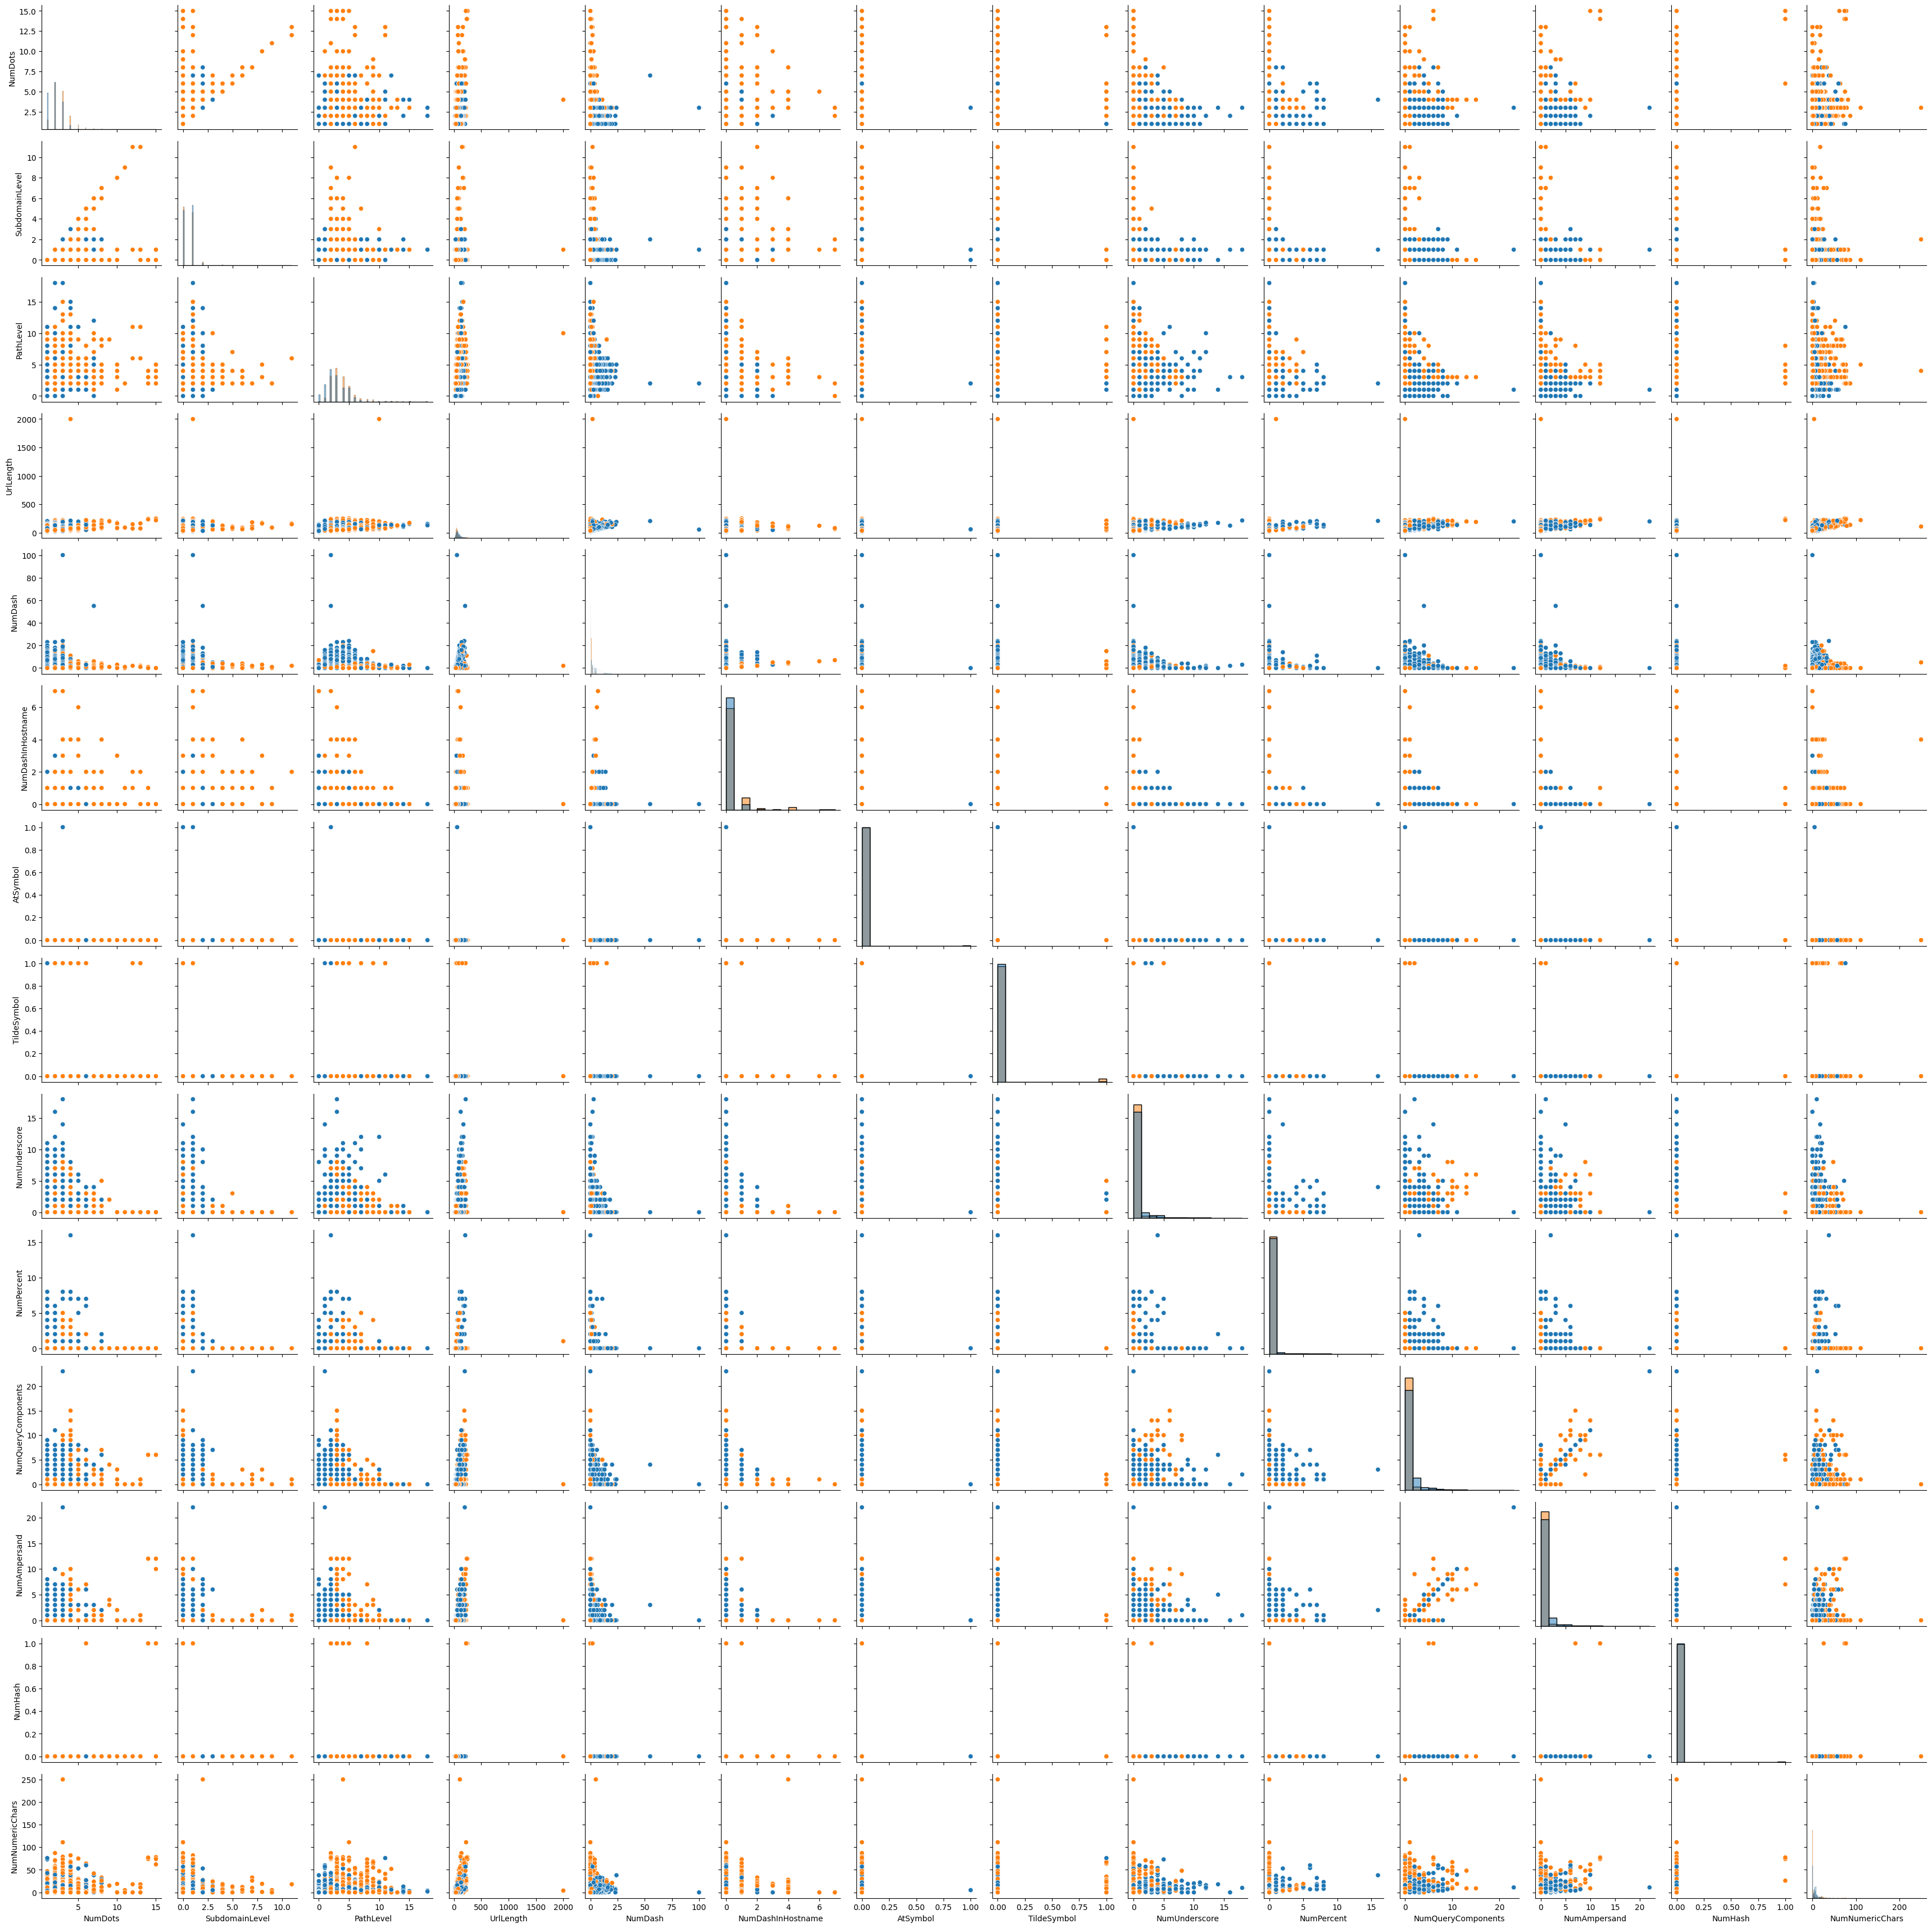

In [ ]:
columns_to_plot_URL=['CLASS_LABEL', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',
                     'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents',
                     'NumAmpersand', 'NumHash', 'NumNumericChars']
g=sns.PairGrid(df[columns_to_plot_URL], hue='CLASS_LABEL')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Scatter plots are a great first step because they show the direction in which the data moves. If the data is concentrated at certain point and show similar trends, either positively or negatively, then the features correlate with each other.

### However, sometimes scatter plots cannot provide enough information to guide a decision. As a result, I also used heatmaps for each group of features to find a numerical value to determine the strength of the possible correlations.

Text(0.5, 1.0, 'Correlation Heatmap')

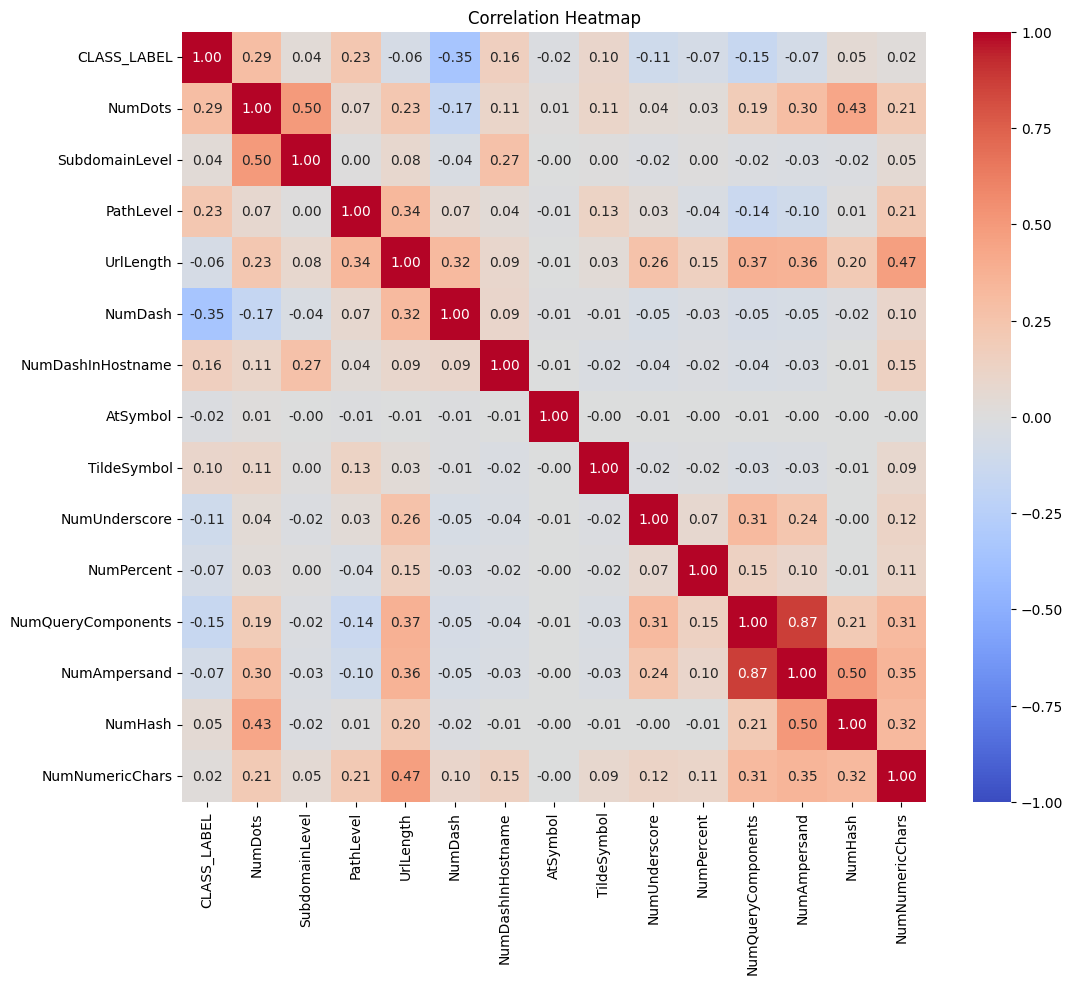

In [ ]:
correlation_matrix = df[columns_to_plot_URL].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

### As shown above, NumDots, SubdomainLevel, and NumHash are correlated. UrlLength and NumNumericChars are correlated. NumHash, NumQueryComponents, and NumAmpersand are strongly correlated. This heatmap shows where significant correlations occur. This will help determine which features to remove later on.

### Then, I repeated the scatter plot and heatmap process for each group of features in search of more correlations.

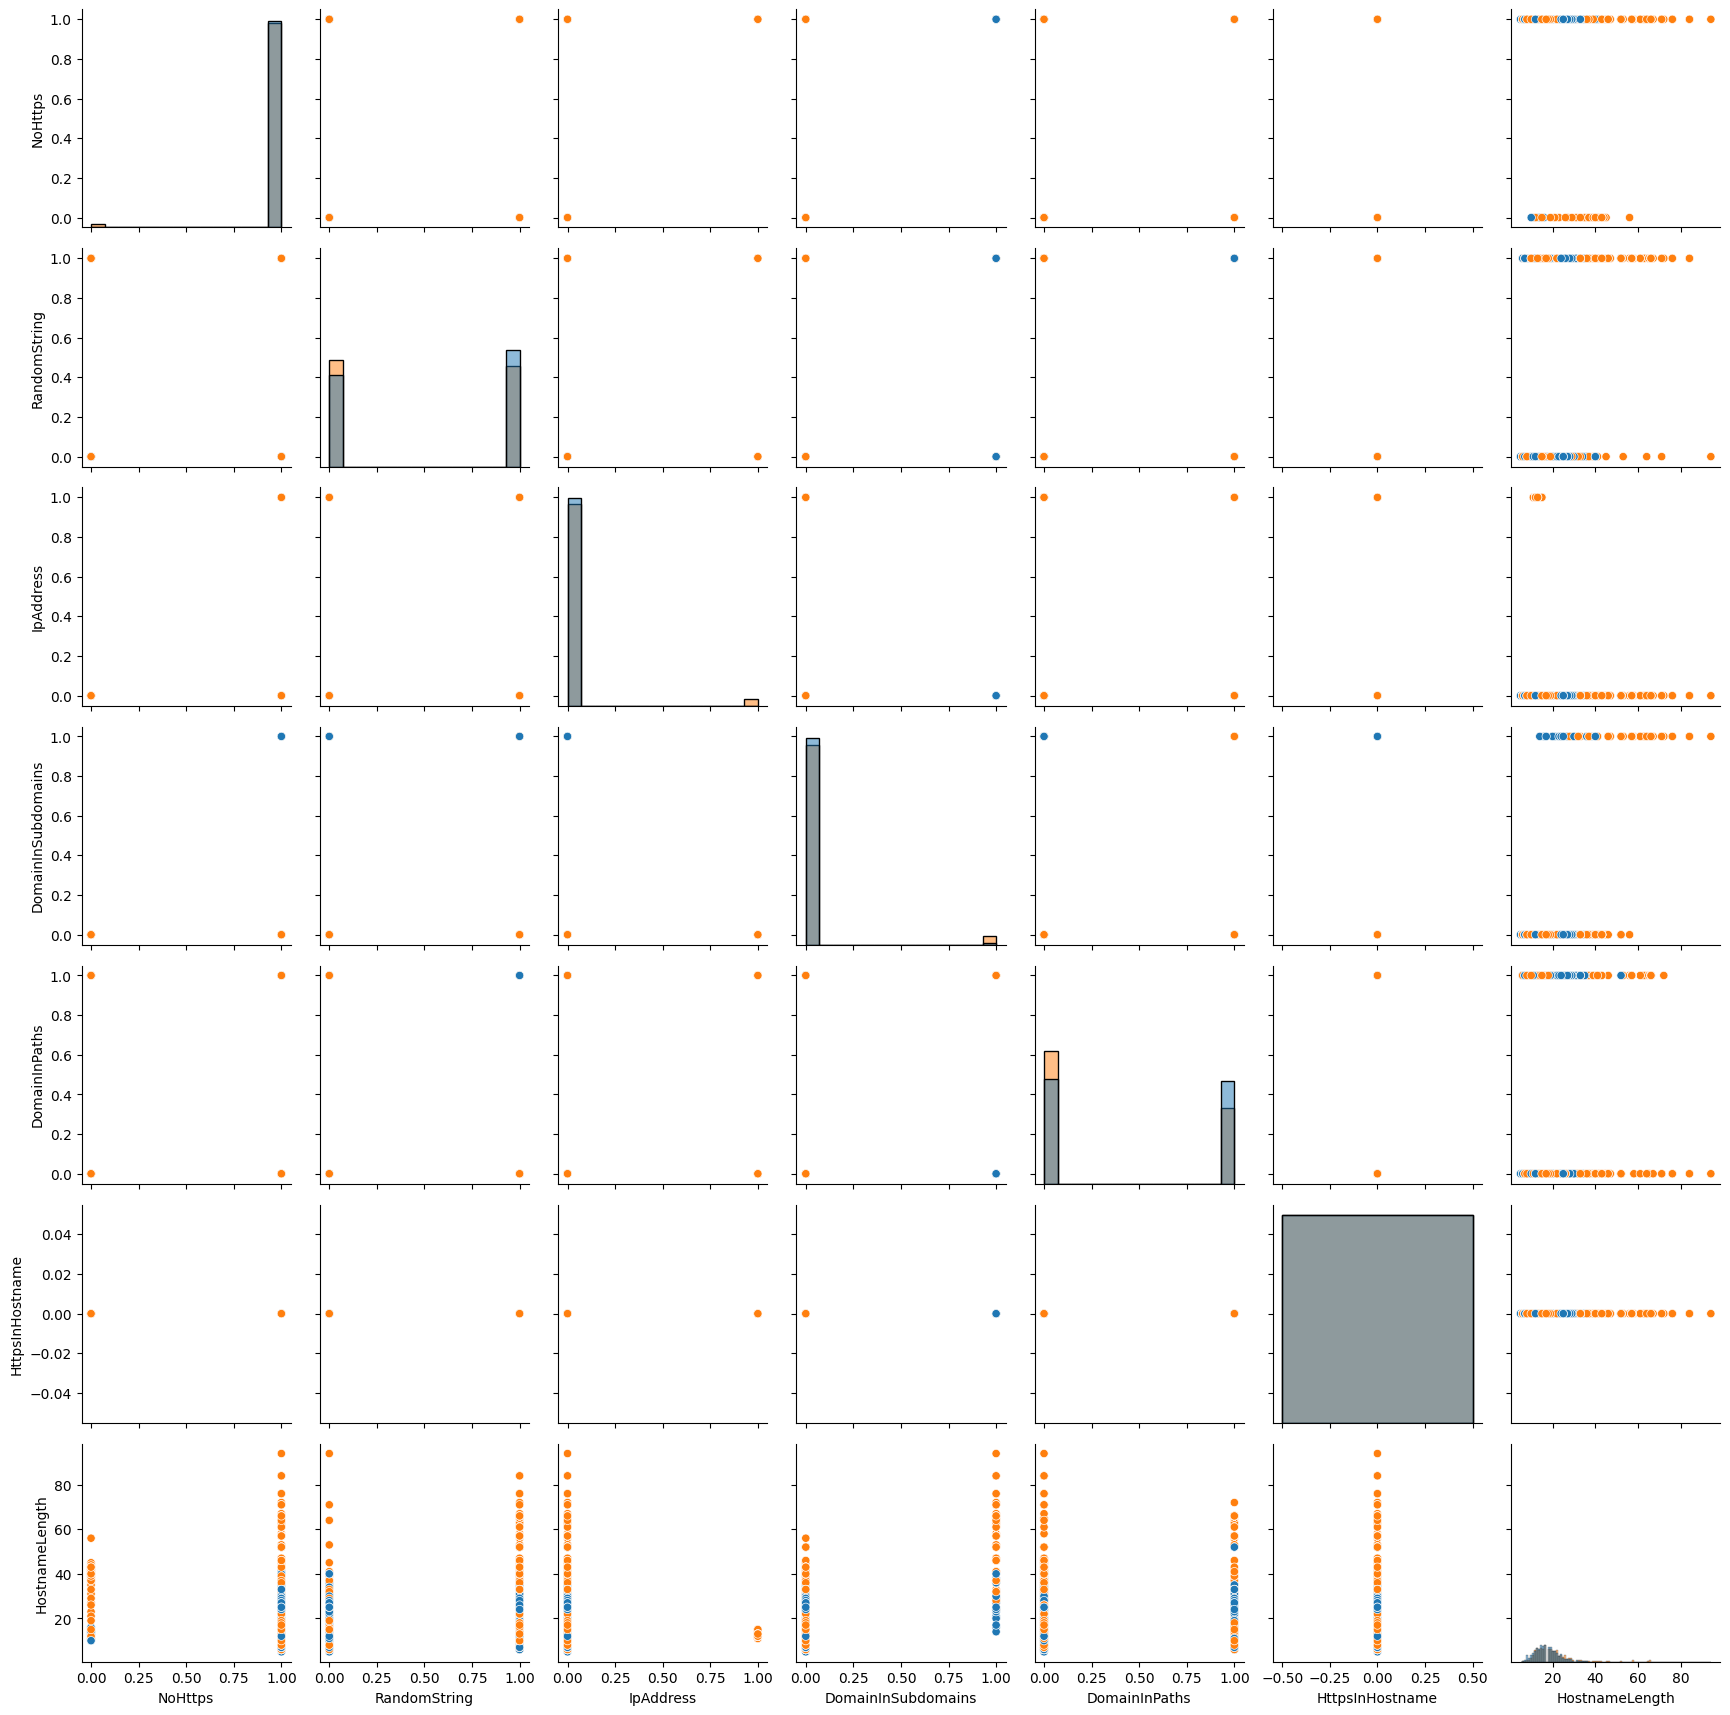

In [ ]:
columns_to_plot_DomainHostname=['CLASS_LABEL', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength']
g=sns.PairGrid(df[columns_to_plot_DomainHostname], hue='CLASS_LABEL')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Text(0.5, 1.0, 'Correlation Heatmap')

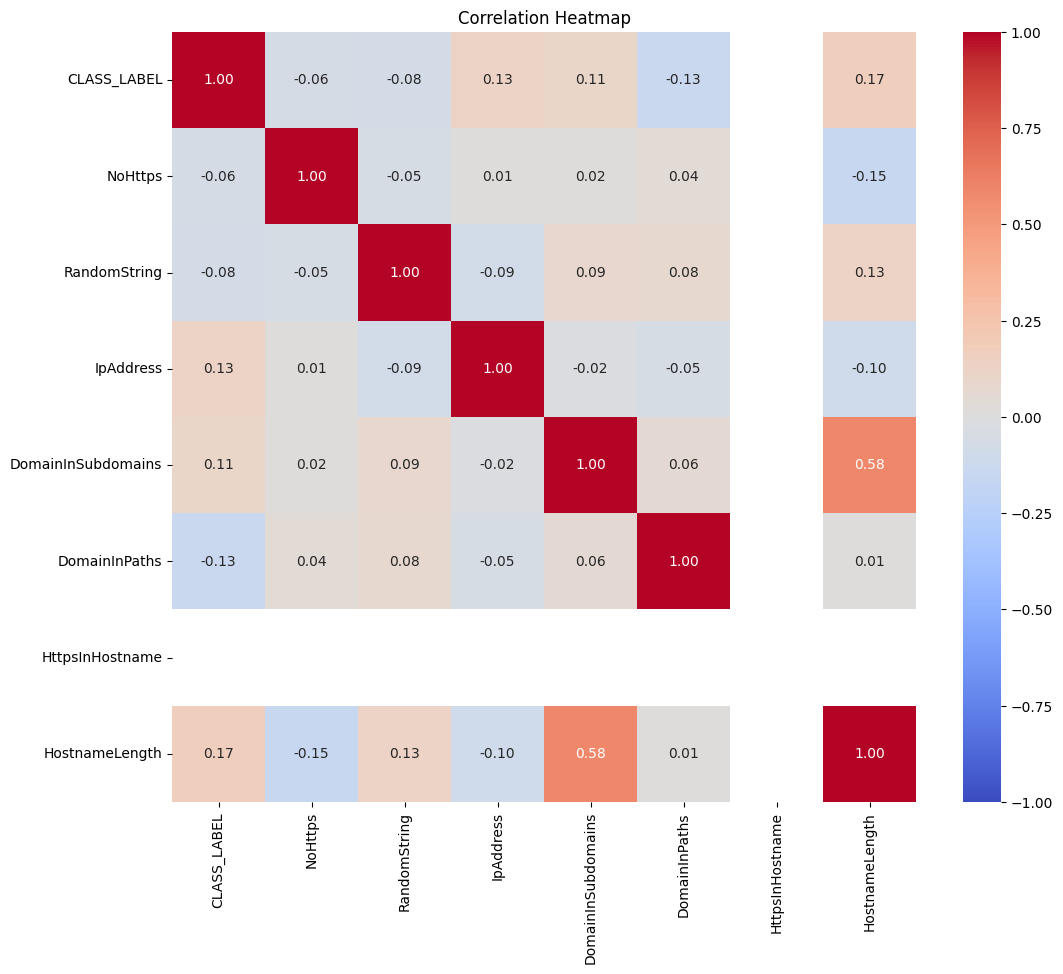

In [ ]:
correlation_matrix = df[columns_to_plot_DomainHostname].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

### For the Domain and Hostname group only HostnameLength and DomainInSubdomains are correlated.

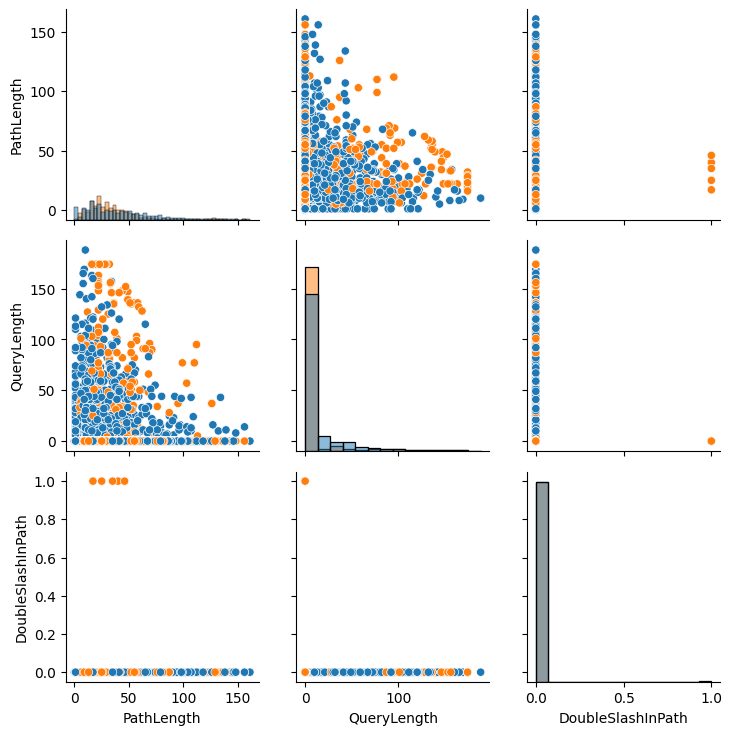

In [ ]:
columns_to_plot_path=['CLASS_LABEL', 'PathLength', 'QueryLength', 'DoubleSlashInPath']
g=sns.PairGrid(df[columns_to_plot_path], hue='CLASS_LABEL')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Text(0.5, 1.0, 'Correlation Heatmap')

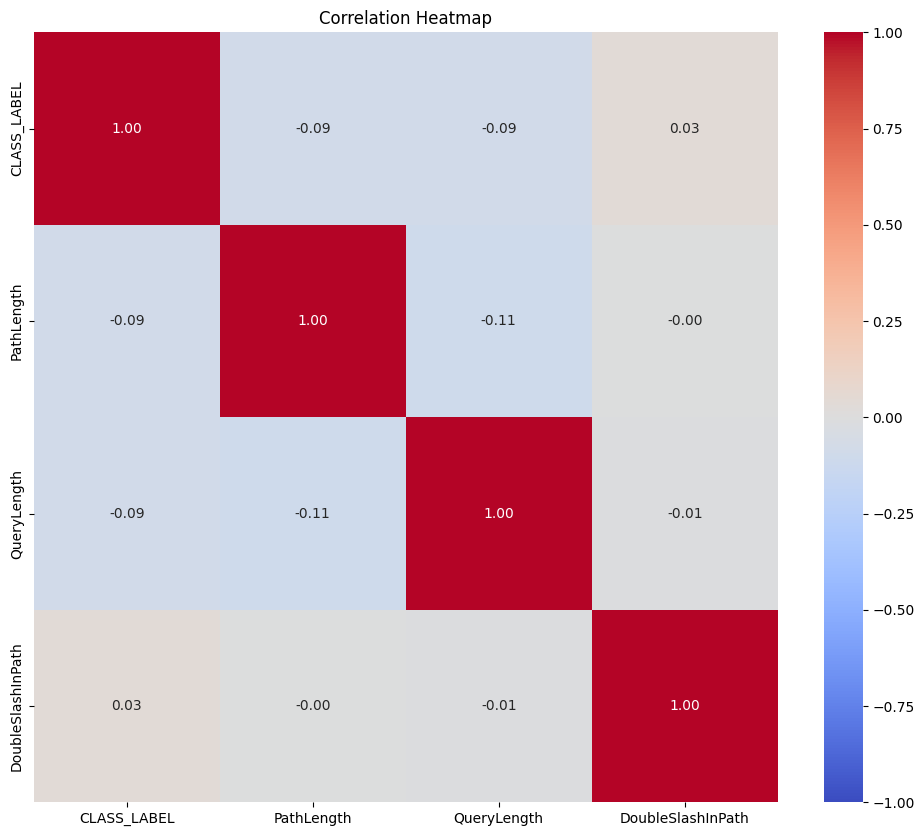

In [ ]:
correlation_matrix = df[columns_to_plot_path].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

### The path group showed little to no correlation, aside from two weak negative correlations.

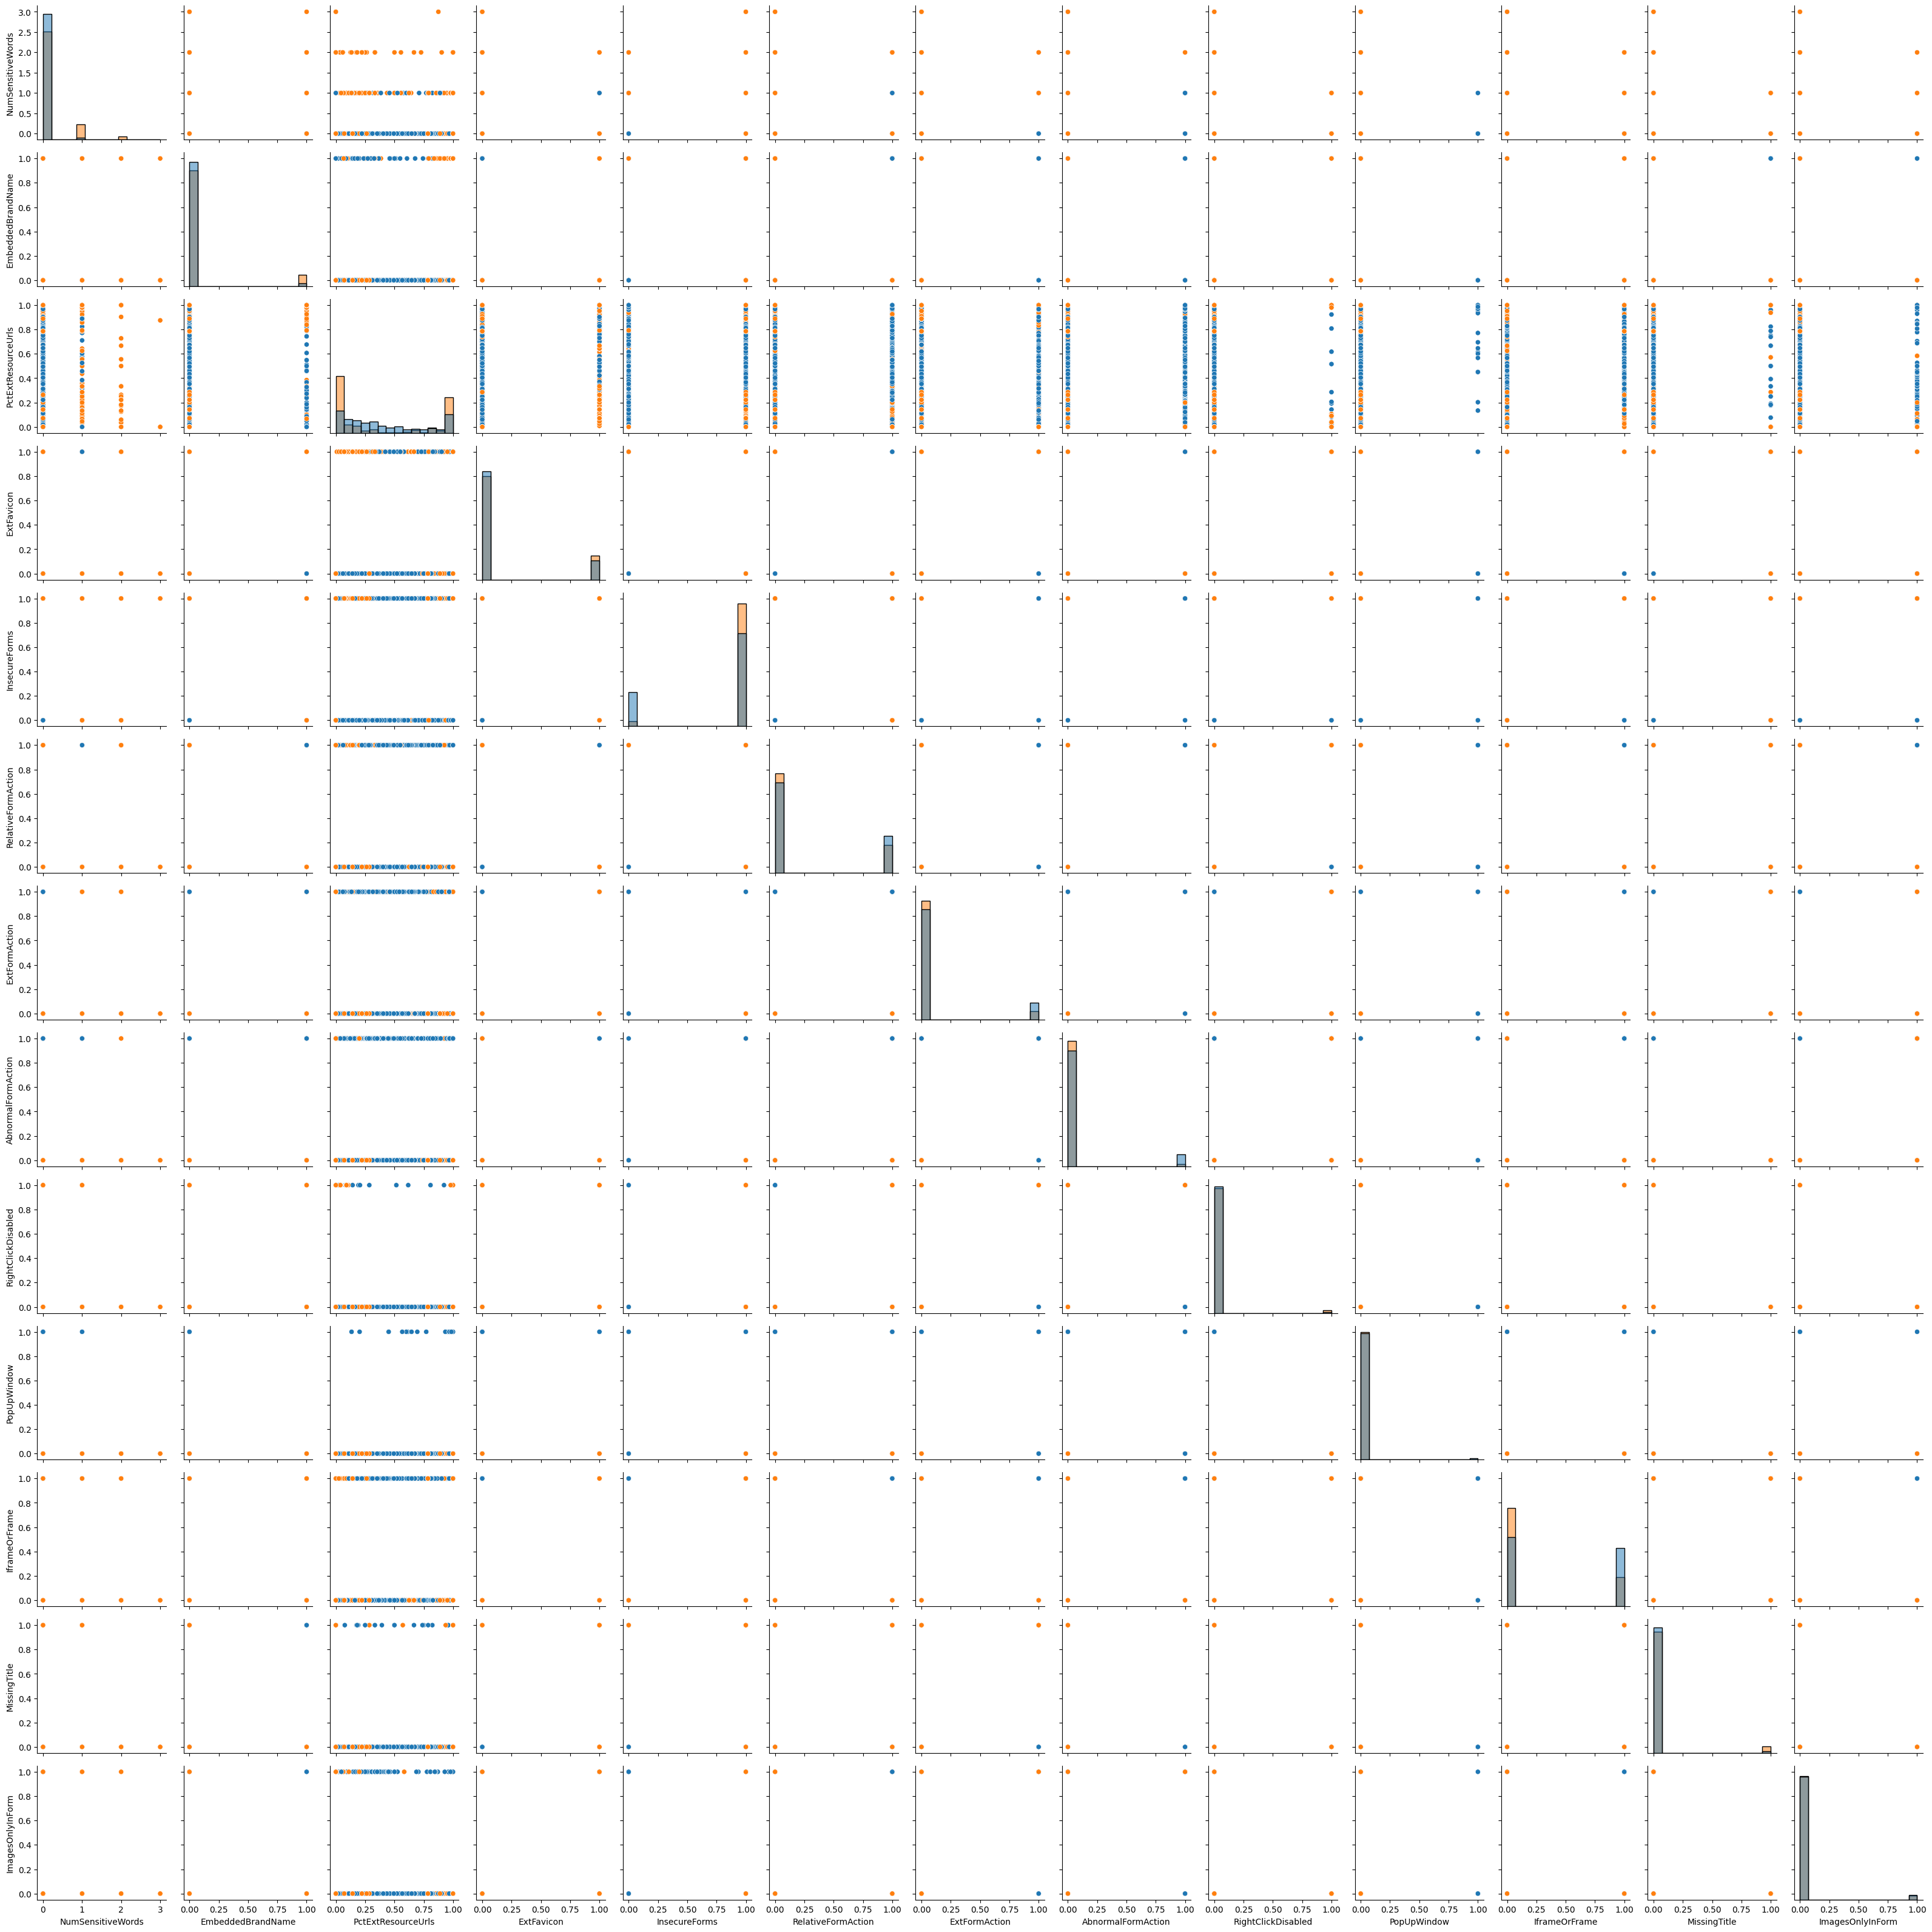

In [ ]:
columns_to_plot_FormAction=['CLASS_LABEL', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
                   'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow',
                   'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']
g=sns.PairGrid(df[columns_to_plot_FormAction], hue='CLASS_LABEL')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Text(0.5, 1.0, 'Correlation Heatmap')

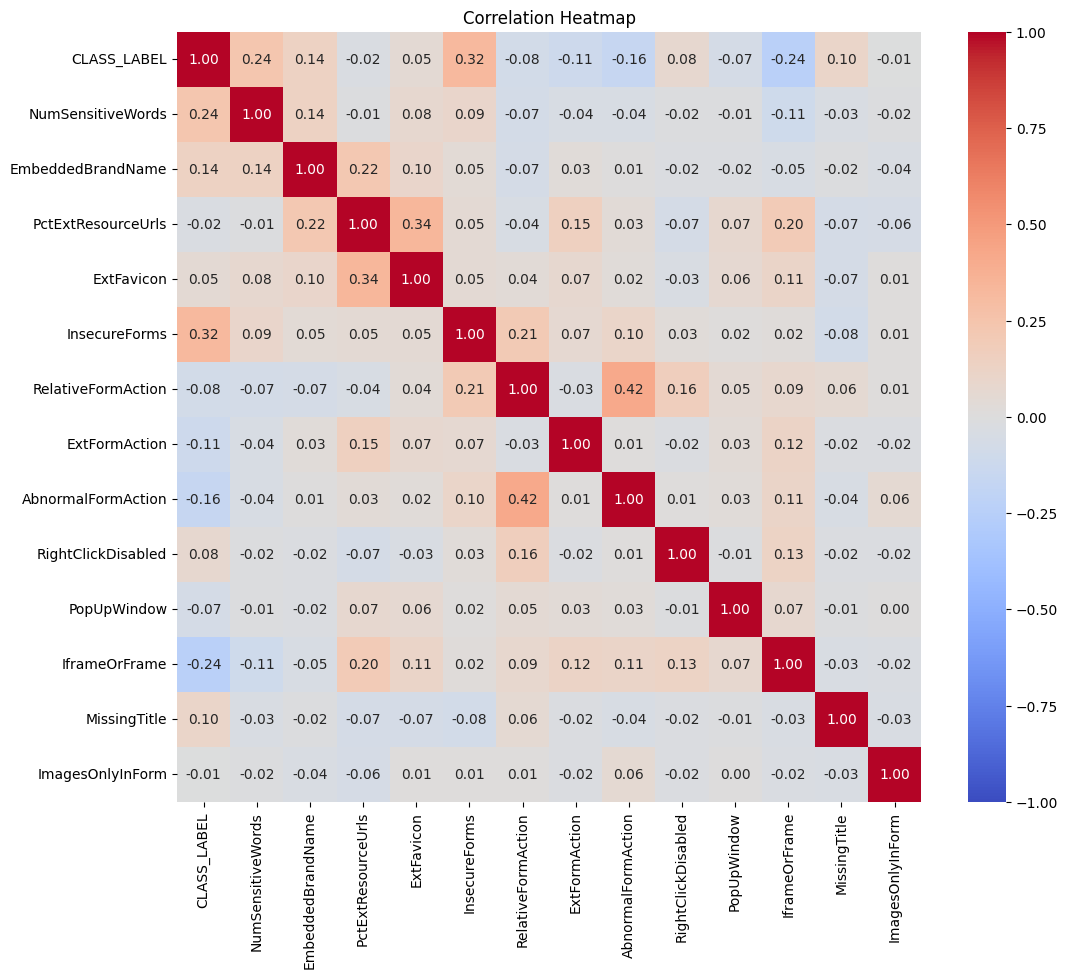

In [ ]:
correlation_matrix = df[columns_to_plot_FormAction].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

### AbnormalFormAction and RelativeFormAction are correlated. ExtFavicon and PctExtResourceUrls are also correlated.

### After finding the correlations, I used recursive feature elimination to determine which features to remove.

In [ ]:
columns_to_select_URL=['NumDots', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',
                       'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
                       'NumNumericChars']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_select_URL], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_select_URL].columns[ rfe_selector.get_support() ]

NameError: ignored

### As a reminder, NumDots, SubdomainLevel, and NumHash are correlated. UrlLength and NumNumericChars are correlated. NumHash, NumQueryComponents, and NumAmpersand are strongly correlated. NumHash, NumAmpersand, NumQueryComponents, and SubdomainLevel will be omitted because they are noticeably correlated with each other. This logic will guide how the remaining groups are handled.

In [ ]:
columns_to_select_DomainHostname=['NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_select_DomainHostname], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_select_DomainHostname].columns[ rfe_selector.get_support() ]


[ True False  True  True False False]


Index(['NoHttps', 'IpAddress', 'DomainInSubdomains'], dtype='object')

### Only HostnameLength and DomainInSubdomains are correlated. HostnameLength will be removed.

In [ ]:
columns_to_select_path=['PathLength', 'QueryLength', 'DoubleSlashInPath']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 1, step = 1)
rfe_selector.fit(df[columns_to_select_path], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_select_path].columns[ rfe_selector.get_support() ]

[False False  True]


Index(['DoubleSlashInPath'], dtype='object')

### Due to the weak correlations and small size of the path group, no features were removed beforehand. To compensate for this, n_features_to_select was set to one instead of three.

In [ ]:
columns_to_select_FormAction=['NumSensitiveWords', 'EmbeddedBrandName', 'PctExtResourceUrls', 'InsecureForms',
                   'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow',
                   'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_select_FormAction], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_select_FormAction].columns[ rfe_selector.get_support() ]

[False False False  True False False False  True False  True False]


Index(['InsecureForms', 'PopUpWindow', 'MissingTitle'], dtype='object')

### AbnormalFormAction and RelativeFormAction are correlated. ExtFavicon and PctExtResourceUrls are also correlated. RelativeFormAction and ExtFavicon will be removed

## Conclusion
### After using recursive feature elimination, only 10 features remain. This means that three more features must go.
+ 'NumDashInHostname'
+ 'AtSymbol'
+ 'TildeSymbol'
+ 'NoHttps'
+ 'IpAddress'
+ 'DomainInSubdomains'
+ 'DoubleSlashInPath'
+ 'InsecureForms'
+ 'PopUpWindow'
+ 'MissingTitle'

### Further research suggests that the 'TildeSymbol' does not provide significant discriminatory power in distinguishing between legitimate and malicious URLs. Also, a 'MissingTitle' is not an automatic sign of a phishing site. Although website titles are essential, a missing title could just be the result of poor web design. Finally 'NumDashInHostname' also seems somewhat irrelevant as I found no evidence that it is associated with phishing sites. However, sources vary on whether or not to include them, but these are minor concerns unrelated to phishing.
### This is the final list of the seven features for the model.
+ 'AtSymbol'
+ 'NoHttps'
+ 'IpAddress'
+ 'DomainInSubdomains'
+ 'DoubleSlashInPath'
+ 'InsecureForms'
+ 'PopUpWindow'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

Feature Importances:
               Feature  Importance
4              NumDash    0.419380
28       InsecureForms    0.234885
10  NumQueryComponents    0.191280
5    NumDashInHostname    0.079934
14             NoHttps    0.038053
26  PctExtResourceUrls    0.032394
0              NumDots    0.004073


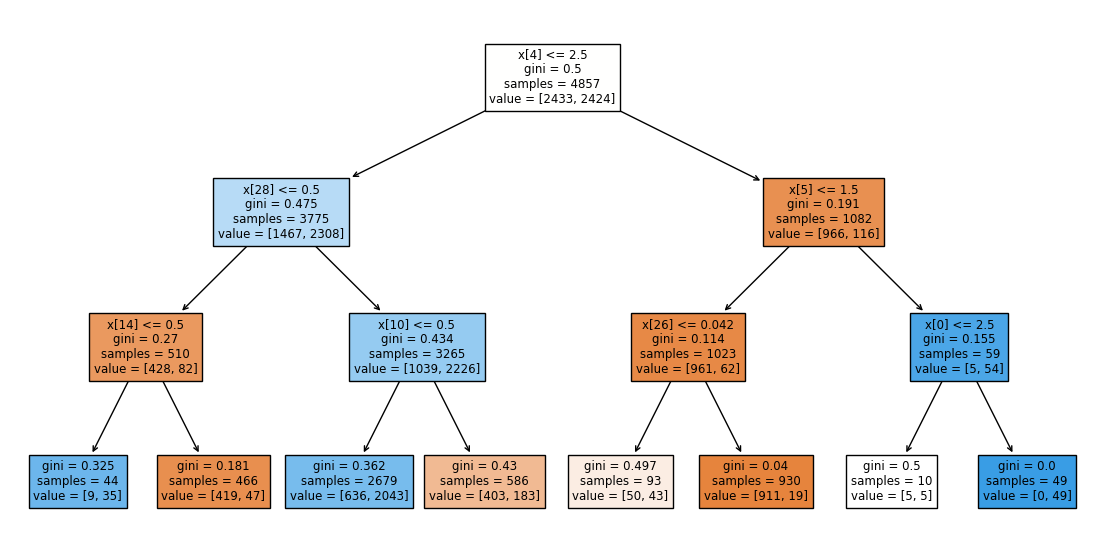

In [ ]:
X=df.drop("CLASS_LABEL", axis=1)
Y=df["CLASS_LABEL"]

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)

Y_predicted=clf.predict(X)

plt.figure(figsize=(14, 7))
tree.plot_tree(clf.fit(X,Y),filled=True,)

feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

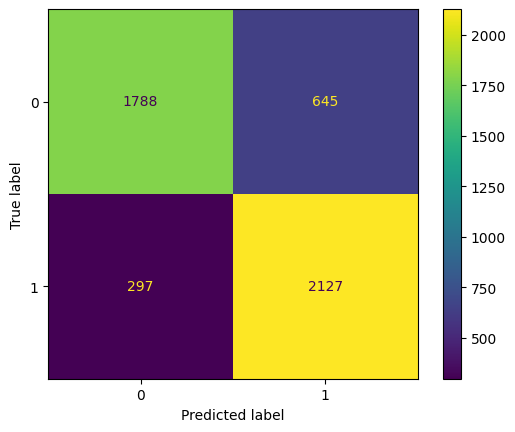

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y, Y_predicted, labels=clf.classes_)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()

In [ ]:

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

ac=accuracy_score(Y, Y_predicted)

print(ac)

pre=precision_score(Y, Y_predicted,average=None)
print(pre)

recall=recall_score(Y, Y_predicted,average=None)
print(recall)

f1 = f1_score(Y, Y_predicted, average=None)
print(f1)

0.8060531192093885
[0.85755396 0.76731602]
[0.73489519 0.87747525]
[0.79150066 0.8187067 ]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)

max_depths = [None, 5, 10, 20]
print(max_depths)

tuned_parameters = [{'min_samples_split': min_samples_splits, 'max_depth': max_depths}]

base_model = DecisionTreeClassifier()

clf = GridSearchCV(estimator=base_model, param_grid=tuned_parameters, cv=5, verbose=3, scoring='roc_auc')

clf.fit(X, Y)

print("Grid Search Results:")
print(clf.cv_results_)

best_params = clf.best_params_
print("Best Parameters:", best_params)

mean_test_scores = clf.cv_results_['mean_test_score']
print("Mean Test Scores:", mean_test_scores)

best_model = clf.best_estimator_

y_pred_proba = best_model.predict_proba(X)[:, 1]
best_model_auc = roc_auc_score(Y, y_pred_proba)
print("AUC for the Best Model:", best_model_auc)


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[None, 5, 10, 20]
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END max_depth=None, min_samples_split=0.1;, score=0.937 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_split=0.1;, score=0.947 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_split=0.1;, score=0.935 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_split=0.1;, score=0.926 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_split=0.1;, score=0.937 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_split=0.2;, score=0.916 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_split=0.2;, score=0.914 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_split=0.2;, score=0.897 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_split=0.2;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_split=0.2;, score=0.895 total time=   0.0s
[CV 1/5] END max_depth=None, min_sampl

In [ ]:
from sklearn.model_selection import cross_val_score
results = []

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:

        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

        auc_scores = cross_val_score(model, X, Y, cv=5, scoring='roc_auc')
        recall_scores = cross_val_score(model, X, Y, cv=5, scoring='recall')
        precision_scores = cross_val_score(model, X, Y, cv=5, scoring='precision')
        f1_scores = cross_val_score(model, X, Y, cv=5, scoring='f1')

        results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'AUC': np.mean(auc_scores),
            'Recall': np.mean(recall_scores),
            'Precision': np.mean(precision_scores),
            'F1': np.mean(f1_scores)
        })

df_results = pd.DataFrame(results)

print(df_results)

    max_depth  min_samples_split       AUC    Recall  Precision        F1
0         NaN                0.1  0.936488  0.870050   0.856195  0.862832
1         NaN                0.2  0.900725  0.708746   0.910136  0.795916
2         NaN                0.3  0.864728  0.830870   0.765836  0.796820
3         NaN                0.4  0.839289  0.830870   0.765836  0.796820
4         NaN                0.5  0.839289  0.830870   0.765836  0.796820
5         NaN                0.6  0.803921  0.830870   0.765836  0.796820
6         NaN                0.7  0.745880  0.893169   0.685405  0.775287
7         NaN                0.8  0.675383  0.938952   0.614532  0.742469
8         NaN                0.9  0.675383  0.938952   0.614532  0.742469
9         NaN                1.0  0.675383  0.938952   0.614532  0.742469
10        5.0                0.1  0.904836  0.937714   0.747749  0.831536
11        5.0                0.2  0.890389  0.870878   0.759751  0.811409
12        5.0                0.3  0.86

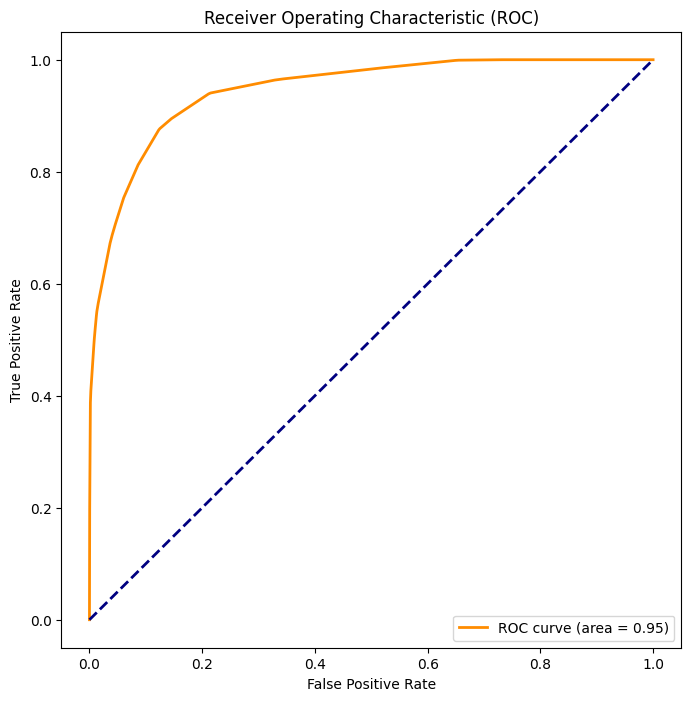

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

best_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)

best_model.fit(X, Y)

y_pred_proba = best_model.predict_proba(X)[:, 1]

fpr, tpr, _ = roc_curve(Y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [244]:
Y=df[["CLASS_LABEL"]]
X=df[["InsecureForms","NumQueryComponents","NumDashInHostname","NoHttps","PctExtResourceUrls","NumDots","IpAddress"]]

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf = KFold(n_splits=5, random_state=None, shuffle=True)

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)

avg_f1_test = []
avg_f1_train = []
avg_n_leaves = []

for mss in min_samples_splits:

    f1_train = []
    f1_test = []
    n_leaves = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        clf = tree.DecisionTreeClassifier(min_samples_split=mss)

        clf = clf.fit(X_train, Y_train)

        Y_test_predicted = clf.predict(X_test)
        Y_train_predicted = clf.predict(X_train)

        f1_test.append(f1_score(Y_test, Y_test_predicted, pos_label=0))
        f1_train.append(f1_score(Y_train, Y_train_predicted, pos_label=0))

        n_leaves.append(clf.get_n_leaves())

    avg_f1_test.append(np.mean(f1_test))
    avg_f1_train.append(np.mean(f1_train))
    avg_n_leaves.append(np.mean(n_leaves))


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'F1')

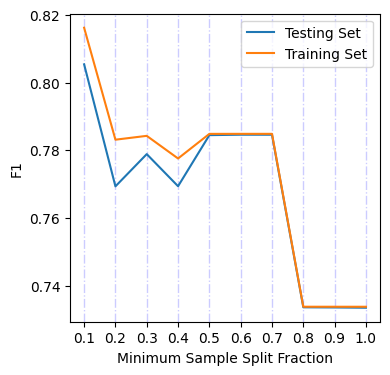

In [230]:
plt.figure(figsize=(4,4))
plt.plot(min_samples_splits,avg_f1_test,label='Testing Set')
plt.plot(min_samples_splits,avg_f1_train,label='Training Set')
plt.legend()
plt.xticks(min_samples_splits)
plt.grid(color='b', axis='x', linestyle='-.', linewidth=1,alpha=0.2)
plt.xlabel('Minimum Sample Split Fraction')
plt.ylabel('F1')

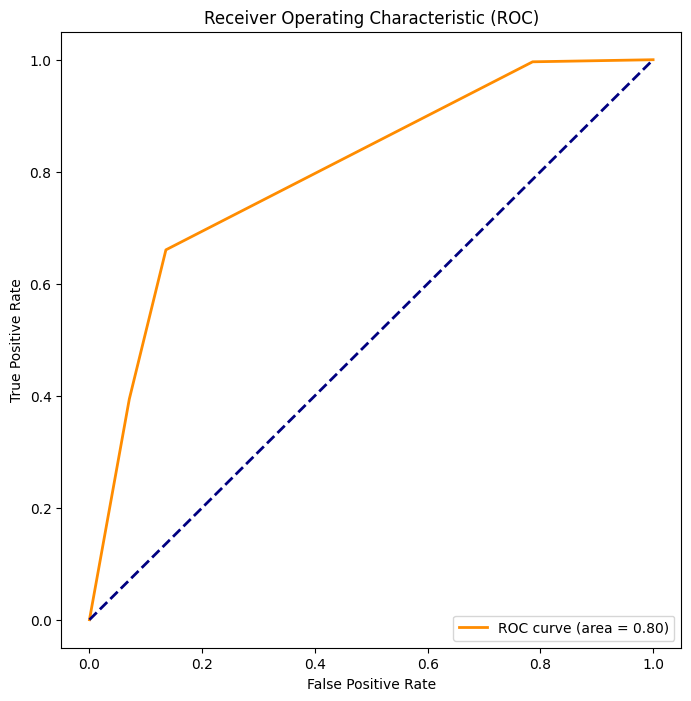

In [231]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=0.5)
clf.fit(X, Y)

Y_prob = clf.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(Y, Y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(Y, Y_pred)
precision = precision_score(Y, Y_pred)
recall = recall_score(Y, Y_pred)
f1 = f1_score(Y, Y_pred)
auc = roc_auc_score(Y, Y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8163
Precision: 0.8260
Recall: 0.8007
F1 Score: 0.8132
AUC: 0.8005


In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, roc_auc_score

param_grid = {'C': [0.1, 1, 10, 20, 30]}

svm_classifier = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X_train, Y_train)

print("Best C:", grid_search.best_params_['C'])

best_svm_classifier = SVC(C=grid_search.best_params_['C'], kernel='rbf')
best_svm_classifier.fit(X_train, Y_train)

Y_pred = best_svm_classifier.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best C: 20


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
clf = svm.SVC(C=20,kernel='rbf')
clf.fit(X, Y)
Y_pre=clf.predict(X)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y, Y_pred)
precision = precision_score(Y, Y_pred)
recall = recall_score(Y, Y_pred)
f1 = f1_score(Y, Y_pred)

Y_prob = clf.decision_function(X)
auc = roc_auc_score(Y, Y_prob)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8138768787317274
Precision: 0.820675105485232
Recall: 0.8023927392739274
F1 Score: 0.8114309553608678
AUC Score: 0.9050807516016706


In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
best_rf.fit(X_train, Y_train)

Y_pred = best_rf.predict(X_test)
Y_prob = best_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_prob)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


<ipython-input-237-07315e3d4f15>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, Y_train)


Accuracy: 0.8578784757981462
Precision: 0.860655737704918
Recall: 0.8571428571428571
F1 Score: 0.8588957055214723
AUC Score: 0.931895710467139


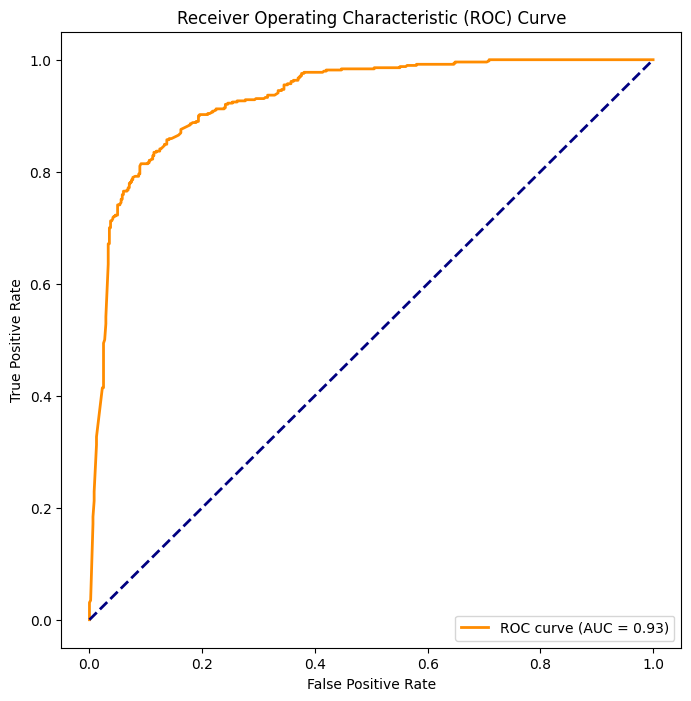

In [238]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

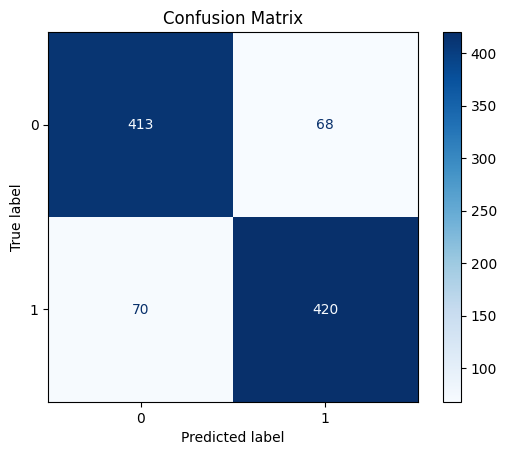

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [242]:
tdf=pd.read_csv('Phishing_Legitimate_test_student (2).csv',index_col='id',na_values=['',' ','n/a','null'])
tdf.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm
id,,,,,,,,,,,,,,,,,,,,,
1,6,1,2,59,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,1,3,76,4,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3,3,1,1,59,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1,3,67,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2,0,4,88,3,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [243]:
tdf=tdf[["InsecureForms","NumQueryComponents","NumDashInHostname","NoHttps","PctExtResourceUrls","NumDots","IpAddress"]]
tdf.head()

,InsecureForms,NumQueryComponents,NumDashInHostname,NoHttps,PctExtResourceUrls,NumDots,IpAddress
id,,,,,,,
1,1,0,0,1,1.00000,6,0
2,1,0,0,1,1.00000,2,0
3,0,0,0,1,0.87500,3,0
4,1,0,0,1,0.15625,5,0
5,1,0,0,1,0.00000,2,0


In [246]:
best_params = {
    'n_estimators': 150,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

best_rf.fit(X,Y)

<ipython-input-246-d34dca0acf94>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X,Y)


RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150)

In [248]:
Y_pred = best_rf.predict(tdf)
print(Y_pred)

[1 1 0 ... 0 1 0]


In [249]:
data = {
     "Prediction": Y_pred,
}
final = pd.DataFrame(data, index=[tdf.index])
final

,Prediction
id,
1,1
2,1
3,0
4,1
5,1
...,...
4996,0
4997,0
4998,0


In [250]:
final.to_csv("Predictions.csv")